In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Sun Nov 13 13:47:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P0    45W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# SDAV Extra - Violin Plots

This notebook will demonstrate the use of Violin Plots. This visualisation technique, similar to a box plot, is well suited for comparing multiple distributions, and show a curved distribution plot for each feature under consideration. Below shows a simple violin plot example using Seaborn.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached lime-0.2.0.1-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.0 MB/s eta 0:00:00


Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).
Drive Mounted


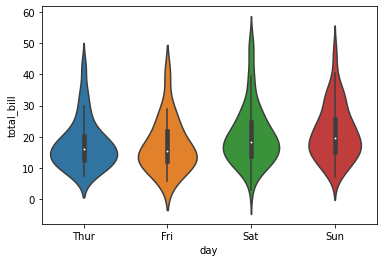

In [2]:
#!pip install seaborn
!pip install lime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('./mount')
print("Drive Mounted")

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## Case Study: Comparing Benign and DDoS behaviours in network traffic analysis using CICIDS2017

Let's consider an example where we want to look at benign and malicious network traffic. We will use to CICIDS2017 dataset for this. This dataset captures in the region of 80 numerical features that characterise network activity. Each data instance has been labelled as either benign or as an attack type (we focus on DDoS here, however other attacks are present in the full dataset). What data attributes set these two classes apart? We can use violin plots to judge this visually over the entire dataset.

### Load in dataset and clean it up

First we will load in the data set, and we will remove all Not-a-Number and Infinity values that may be present. We will also remove columns that contain only zeros (i.e., no separating features).

In [3]:
# Load in the dataset

DATASET_PATH = 'mount/My Drive/Colab Notebooks/FIXED-CICIDS2017/'
df1 = pd.read_csv(DATASET_PATH + 'Friday-WorkingHours.csv')

#df1=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
print("Read in df1 - DDoS")

#df2=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#print("Read in df2 - PortScan")
    
#df3=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Friday-WorkingHours-Morning.pcap_ISCX.csv')
#print("Read in df3 - Botnet")
    
df4=pd.read_csv(DATASET_PATH + 'Monday-WorkingHours.csv')
print("Read in df4 - Benign (Normal Human Activities)")
    
df5=pd.read_csv(DATASET_PATH + 'Thursday-WorkingHours.csv')
print("Read in df5 - Infiltration")
    
#df6=pd.read_csv(DATASET_PATH + 'Thursday-WorkingHours.csv')
#print("Read in df6 - Web Attacks")
    
df7=pd.read_csv(DATASET_PATH + 'Tuesday-WorkingHours.csv')
print("Read in df7 - Brute Force")
    
df8=pd.read_csv(DATASET_PATH + 'Wednesday-WorkingHours.csv')
print("Read in df8 - DoS/DDoS/HeartBleed")

#frames = [df1, df2, df3, df4]
#frames = [df1, df2, df3, df4, df5, df6, df7, df8]
frames = [df1, df4, df5, df7, df8]
print("Before Concat")
df = pd.concat(frames)

#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
df

Read in df1 - DDoS
Read in df4 - Benign (Normal Human Activities)
Read in df5 - Infiltration
Read in df7 - Brute Force
Read in df8 - DoS/DDoS/HeartBleed
Before Concat


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.50-192.168.10.3-56108-3268-6,192.168.10.50,56108,192.168.10.3,3268,6,07/07/2017 01:59:50 PM,112740690,32,16,...,32,3.594286e+02,1.199802e+01,380.0,343.0,1.610540e+07,4.988048e+05,16399772.0,15375229.0,BENIGN
1,192.168.10.50-192.168.10.3-42144-389-6,192.168.10.50,42144,192.168.10.3,389,6,07/07/2017 01:59:50 PM,112740560,32,16,...,32,3.202857e+02,1.574499e+01,330.0,285.0,1.610543e+07,4.987937e+05,16399782.0,15375263.0,BENIGN
2,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,07/07/2017 02:00:31 PM,113757377,545,0,...,0,9.361829e+06,7.324646e+06,18851791.0,19.0,1.221036e+07,6.935824e+06,20757030.0,5504997.0,BENIGN
3,192.168.10.25-224.0.0.251-5353-5353-17,192.168.10.25,5353,224.0.0.251,5353,17,07/07/2017 02:00:42 PM,91997219,388,0,...,8,9.801664e+06,1.152782e+07,24721964.0,16.0,1.319764e+07,5.826905e+06,19776791.0,5817470.0,BENIGN
4,192.168.10.25-17.253.14.125-123-123-17,192.168.10.25,123,17.253.14.125,123,17,07/07/2017 02:00:42 PM,66966070,6,6,...,8,1.968172e+06,0.000000e+00,1968172.0,1968172.0,6.497443e+07,0.000000e+00,64974431.0,64974431.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496774,192.168.10.8-198.51.152.183-59942-80-6,192.168.10.8,59942,198.51.152.183,80,6,05/07/2017 07:50:58 PM,5074745,7,6,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN
496775,192.168.10.16-192.168.10.3-27998-53-17,192.168.10.16,27998,192.168.10.3,53,17,05/07/2017 03:03:34 PM,209,2,2,...,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN
496776,192.168.10.51-23.208.163.130-58030-443-6,192.168.10.51,58030,23.208.163.130,443,6,05/07/2017 03:04:59 PM,116281383,24,21,...,20,4.863300e+04,8.804912e+04,328226.0,23012.0,9.639210e+06,1.321437e+06,10024910.0,5443180.0,BENIGN
496777,192.168.10.5-192.168.10.3-51818-53-17,192.168.10.5,51818,192.168.10.3,53,17,05/07/2017 08:20:02 PM,149,2,2,...,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN


In [4]:
# What columns are left?
print (df.columns)
# How many columns?
print ("Length: ", len(df.columns))

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

### Normalise each column

Each column has its own range of values - some are quite narrow, some are quite large. We often normalise data to make it easier to work with and draw comparisons - this essentially means scaling it to be within a fixed range. Here, we want to normalise each feature indepedently - essentially meaning that each column will have a minimum value of zero and a maximum value of one, and all values for that particular feature will be scaled within this range.

We will use the sci-kit learn library to achieve this.

In [5]:
# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
Y_attack = le.transform(df['Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg
0,0.939506,0.000146,0.000055,0.000501,1.757565e-06,0.016237,0.000000,0.034889,0.028767,0.003687,...,0.0,0.0,0.029536,0.074486,0.034889,0.016473,0.000000,0.000000,0.000000,0.000000
1,0.939505,0.000146,0.000055,0.000501,7.713757e-06,0.016237,0.000000,0.034889,0.028767,0.016180,...,0.0,0.0,0.029536,0.112749,0.034889,0.072300,0.000000,0.000000,0.000000,0.000000
2,0.947978,0.002480,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.766644,0.001766,0.000000,0.002887,0.000000e+00,0.009146,0.025136,0.016579,0.007839,0.000000,...,0.0,0.0,0.000000,0.045045,0.016579,0.000000,0.001016,0.004984,0.000010,0.000000
4,0.558051,0.000027,0.000021,0.000022,4.393912e-07,0.001934,0.032609,0.008311,0.000000,0.002458,...,0.0,0.0,0.059072,0.022581,0.008311,0.010982,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496774,0.042290,0.000032,0.000021,0.000045,1.836899e-06,0.023449,0.000000,0.014396,0.030910,0.030824,...,0.0,0.0,0.050633,0.064631,0.014396,0.045912,0.000000,0.000000,0.000000,0.000000
496775,0.000002,0.000009,0.000007,0.000005,3.509027e-07,0.001410,0.023777,0.006060,0.000000,0.005888,...,0.0,0.0,0.059072,0.035283,0.006060,0.026312,0.000000,0.000000,0.000000,0.000000
496776,0.969012,0.000109,0.000072,0.000054,8.255368e-06,0.012973,0.000000,0.005043,0.011133,0.074142,...,0.0,0.0,0.051688,0.063875,0.005043,0.058953,0.000000,0.000000,0.000000,0.000029
496777,0.000001,0.000009,0.000007,0.000006,1.586691e-07,0.001450,0.024457,0.006233,0.000000,0.002663,...,0.0,0.0,0.059072,0.020699,0.006233,0.011897,0.000000,0.000000,0.000000,0.000000


### Separate data based on class

We have scaled the entire dataset so that all data for each feature is scaled in a consistent manner. We now want to split our dataset based on the classes of data that exist. Here, we know we have benign and DDoS classes.

In [6]:
# Output the classes
outcome = df['Label'].unique()
print(outcome)

Y_attack = df['Label']
print(Y_attack)

['BENIGN' 'Bot - Attempted' 'Bot' 'PortScan' 'DDoS'
 'Web Attack - Brute Force' 'Web Attack - Brute Force - Attempted'
 'Infiltration - Attempted' 'Infiltration' 'Web Attack - XSS - Attempted'
 'Web Attack - XSS' 'Web Attack - Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'FTP-Patator - Attempted' 'SSH-Patator - Attempted'
 'DoS slowloris' 'DoS slowloris - Attempted' 'DoS Slowhttptest'
 'DoS Slowhttptest - Attempted' 'DoS Hulk' 'DoS Hulk - Attempted'
 'DoS GoldenEye' 'Heartbleed' 'DoS GoldenEye - Attempted']
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
496774    BENIGN
496775    BENIGN
496776    BENIGN
496777    BENIGN
496778    BENIGN
Name: Label, Length: 2100021, dtype: object


#Resample the dataset adjusting for bias

In [7]:
# Resample
import imblearn
print("imblearn:" + imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# print(Y_class)
print(Y_attack)
x_scaled = np.array(df2)
transformed_label = le.fit_transform(Y_attack)
print(transformed_label)

#define oversampling strategy
print(outcome)
# orig_sampling_strategy = {
#     "BENIGN"                    : 2271320,
#     "DDoS"                      :  128025,
#     'PortScan'                  :  158804, 
#     'Bot'                       :    1956, 
#     'Infiltration'               :      36,
#     'Web Attack � Brute Force'  :    1507, 
#     'Web Attack � XSS'          :     652,
#     'Web Attack � Sql Injection':      21, 
#     'FTP-Patator'               :    7935, 
#     'SSH-Patator'               :    5897, 
#     'DoS slowloris'             :    5796,
#     'DoS Slowhttptest'          :    5499, 
#     'DoS Hulk'                  :  231073, 
#     'DoS GoldenEye'             :   10293, 
#     'Heartbleed'                :      11
# }

over_sampling_strategy25 = { # Minimum 25
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :      36,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':      25, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :      25
}

over_sampling_strategy30 = { # Minimum 30
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :      36,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':      30, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :      30
}

over_sampling_strategy200 = { # Minimum 200
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :     200,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':     200, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :     200
}

over_sampling_strategy_300 = { # Minimum 300
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :     300,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':     300, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :     300
}

over_sampling_strategy_orig = { # Minimum 300
    'BENIGN'                                  : 2017042,
    'Bot - Attempted'                         : 1470,
    'Bot'                                     : 738,  
    'PortScan'                                : 159151,
    'DDoS'                                    : 95123,
    'Web Attack - Brute Force'                : 151,
    'Web Attack - Brute Force - Attempted'    : 1214,
    'Infiltration - Attempted'                 : 16,
    'Infiltration'                             : 32,
    'Web Attack - XSS - Attempted'            : 652,
    'Web Attack - XSS'                        : 27,
    'Web Attack - Sql Injection'              : 12,
    'FTP-Patator'                             : 3973,
    'SSH-Patator'                             : 2980,
    'FTP-Patator - Attempted'                 : 11,
    'SSH-Patator - Attempted'                 : 8,
    'DoS slowloris'                           : 4001,
    'DoS slowloris - Attempted'               : 1731,
    'DoS Slowhttptest'                        : 1742,
    'DoS Slowhttptest - Attempted'            : 3369,
    'DoS Hulk'                                : 158469,
    'DoS Hulk - Attempted'                    : 593,
    'DoS GoldenEye'                           : 7567,
    'Heartbleed'                              : 11,
    'DoS GoldenEye - Attempted'               : 80
}

over_sampling_strategy300 = { # Minimum 300
    'BENIGN'                                  : 2017042,
    'Bot - Attempted'                         :    1470,
    'Bot'                                     :     738,  
    'PortScan'                                :  159151,
    'DDoS'                                    :   95123,
    'Web Attack - Brute Force'                :     399,
    'Web Attack - Brute Force - Attempted'    :    1214,
    'Infiltration - Attempted'                 :     300,
    'Infiltration'                             :     300,
    'Web Attack - XSS - Attempted'            :     652,
    'Web Attack - XSS'                        :     300,
    'Web Attack - Sql Injection'              :     300,
    'FTP-Patator'                             :    3973,
    'SSH-Patator'                             :    2980,
    'FTP-Patator - Attempted'                 :     300,
    'SSH-Patator - Attempted'                 :     300,
    'DoS slowloris'                           :    4001,
    'DoS slowloris - Attempted'               :    1731,
    'DoS Slowhttptest'                        :    1742,
    'DoS Slowhttptest - Attempted'            :    3369,
    'DoS Hulk'                                :  158469,
    'DoS Hulk - Attempted'                    :     593,
    'DoS GoldenEye'                           :    7567,
    'Heartbleed'                              :     300,
    'DoS GoldenEye - Attempted'               :     300
}

over_sampling_strategy300 = { # Minimum 200
    'BENIGN'                                  : 2017042,
    'Bot - Attempted'                         :    1470,
    'Bot'                                     :     738,  
    'PortScan'                                :  159151,
    'DDoS'                                    :   95123,
    'Web Attack - Brute Force'                :     399,
    'Web Attack - Brute Force - Attempted'    :    1214,
    'Infiltration - Attempted'                 :     200,
    'Infiltration'                             :     200,
    'Web Attack - XSS - Attempted'            :     652,
    'Web Attack - XSS'                        :     200,
    'Web Attack - Sql Injection'              :     200,
    'FTP-Patator'                             :    3973,
    'SSH-Patator'                             :    2980,
    'FTP-Patator - Attempted'                 :     200,
    'SSH-Patator - Attempted'                 :     300,
    'DoS slowloris'                           :    4001,
    'DoS slowloris - Attempted'               :    1731,
    'DoS Slowhttptest'                        :    1742,
    'DoS Slowhttptest - Attempted'            :    3369,
    'DoS Hulk'                                :  158469,
    'DoS Hulk - Attempted'                    :     593,
    'DoS GoldenEye'                           :    7567,
    'Heartbleed'                              :     200,
    'DoS GoldenEye - Attempted'               :     200
}


over = RandomOverSampler(sampling_strategy = over_sampling_strategy300)
print("Oversampling...")
x_over, y_over = over.fit_resample(x_scaled, Y_attack)
x_scaled = x_over
Y_attack = y_over

print("Finished oversampling...")

#define undersampling strategy
under = RandomUnderSampler(sampling_strategy = 'not minority')
print("Undersampling...")
x_under, y_under = under.fit_resample(x_scaled, Y_attack)
print("Finished undersampling...")

print(x_under)
print(y_under)
#from now on use undersampled
x_scaled = x_under
Y_class  = y_under

tempdf2 = pd.DataFrame(x_scaled,columns=subset.columns)
templabledf = pd.DataFrame(Y_class,columns=['Label']) 


print(tempdf2.shape)

print("====")

print(templabledf.shape)

# df74 = pd.concat([tempdf2, templabledf.reindex(df1.index)], axis=1)
dfresampled = tempdf2
dfresampled['Label'] = templabledf

print(dfresampled.shape)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dfresampled['Label'])
transformed_label = le.transform(templabledf['Label']) # multi-class 
print(transformed_label)

#quick fix?
df2 = dfresampled 




imblearn:0.8.1
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
496774    BENIGN
496775    BENIGN
496776    BENIGN
496777    BENIGN
496778    BENIGN
Name: Label, Length: 2100021, dtype: object
[0 0 0 ... 0 0 0]
['BENIGN' 'Bot - Attempted' 'Bot' 'PortScan' 'DDoS'
 'Web Attack - Brute Force' 'Web Attack - Brute Force - Attempted'
 'Infiltration - Attempted' 'Infiltration' 'Web Attack - XSS - Attempted'
 'Web Attack - XSS' 'Web Attack - Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'FTP-Patator - Attempted' 'SSH-Patator - Attempted'
 'DoS slowloris' 'DoS slowloris - Attempted' 'DoS Slowhttptest'
 'DoS Slowhttptest - Attempted' 'DoS Hulk' 'DoS Hulk - Attempted'
 'DoS GoldenEye' 'Heartbleed' 'DoS GoldenEye - Attempted']
Oversampling...


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (2017042) in class BENIGN will be larger than the number of samples in the majority class (class #BENIGN -> 1657069)
  f"After over-sampling, the number of samples ({n_samples})"


Finished oversampling...
Undersampling...
Finished undersampling...
[[1.80833317e-06 9.10087869e-06 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.16160327e-01 2.86677679e-04 3.11727105e-04 ... 0.00000000e+00
  0.00000000e+00 1.96342381e-04]
 [1.31699988e-03 4.55043934e-06 3.42557258e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.21410545e-02 1.82017574e-05 1.02767178e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.61400041e-02 1.82017574e-05 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.46743042e-02 1.82017574e-05 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
0                             BENIGN
1                             BENIGN
2                             BENIGN
3                             BENIGN
4                             BENIGN
                    ...             
4995    Web Attack - XSS - Attempted
4996    Web Attack - XSS - Attempted
4997    Web Attack - XSS - Attempted

In [8]:
print(df2)
df2.to_csv('mount/My Drive/Colab Notebooks/FIXED-CICIDS2017/resampledforbalance.csv')


      Flow Duration  Total Fwd Packet  Total Bwd packets  \
0      1.808333e-06          0.000009           0.000007   
1      6.161603e-01          0.000287           0.000312   
2      1.317000e-03          0.000005           0.000003   
3      1.416667e-07          0.000009           0.000000   
4      1.950000e-06          0.000009           0.000007   
...             ...               ...                ...   
4995   4.171521e-02          0.000018           0.000007   
4996   4.482781e-02          0.000018           0.000007   
4997   4.214105e-02          0.000018           0.000010   
4998   4.614000e-02          0.000018           0.000007   
4999   4.467430e-02          0.000018           0.000007   

      Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                       0.000006                1.708744e-07   
1                       0.000309                2.113868e-04   
2                       0.000003                3.020815e-07   
3                      

In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)

# Split data based on identified classes
my_df2 = df2
my_df2['Label'] = transformed_label
print(my_df2)
print(my_df2.values)
X = pd.DataFrame(pca.fit_transform(my_df2.values), columns=['x', 'y'])
X['Label'] = my_df2['Label']

# df2[' Label'] = df[' Label']
class0X = X[X['Label'] == 0] 
            # outcome[0]]
class1X = X[X['Label'] == 1] 
          # outcome[1]]
class2X = X[X['Label'] == 2]
class3X = X[X['Label'] == 3]
class4X = X[X['Label'] == 4]
class5X = X[X['Label'] == 5]
class6X = X[X['Label'] == 6]
class7X = X[X['Label'] == 7]
class8X = X[X['Label'] == 8]
class9X = X[X['Label'] == 9]
class10X = X[X['Label'] == 10]
class11X = X[X['Label'] == 11]
class12X = X[X['Label'] == 12]
class13X = X[X['Label'] == 13]
class14X = X[X['Label'] == 14]
class15X = X[X['Label'] == 15]
class16X = X[X['Label'] == 16]
class17X = X[X['Label'] == 17]
class18X = X[X['Label'] == 18]
class19X = X[X['Label'] == 19]
class20X = X[X['Label'] == 20]
class21X = X[X['Label'] == 21]
class22X = X[X['Label'] == 22]
class23X = X[X['Label'] == 23]
class24X = X[X['Label'] == 24]
class25X = X[X['Label'] == 25]

#traffictypes = [benign, ddos, portscan ,bot, infiltration,
#webattackbruteforce, webattackxxs, webattacksqlinjection,
#ftppatator, sshpatator, dosslowloris, dosslowhttptest, doshulk , dosgoldeneye, heartbleed ]

traffictypes = Y_class.unique()
print(traffictypes)

      Flow Duration  Total Fwd Packet  Total Bwd packets  \
0      1.808333e-06          0.000009           0.000007   
1      6.161603e-01          0.000287           0.000312   
2      1.317000e-03          0.000005           0.000003   
3      1.416667e-07          0.000009           0.000000   
4      1.950000e-06          0.000009           0.000007   
...             ...               ...                ...   
4995   4.171521e-02          0.000018           0.000007   
4996   4.482781e-02          0.000018           0.000007   
4997   4.214105e-02          0.000018           0.000010   
4998   4.614000e-02          0.000018           0.000007   
4999   4.467430e-02          0.000018           0.000007   

      Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                       0.000006                1.708744e-07   
1                       0.000309                2.113868e-04   
2                       0.000003                3.020815e-07   
3                      

In [10]:
class0X

,x,y,Label
0,11.995863,-0.516931,0
1,12.002042,0.718126,0
2,11.996398,-0.492423,0
3,11.995642,-0.527986,0
4,11.996149,-0.504129,0
...,...,...,...
195,11.995840,-0.517766,0
196,11.999338,-0.155674,0
197,11.995912,-0.514098,0
198,11.996038,-0.508435,0


### Visualise the output

We now have our data split into the classes, so we can use the violin plot for each of our classes independently, and compare the two figures.

In [11]:
def violinplot(traffictype, trafficstring):

  plot_violin = False
  
  if(plot_violin):
    # traffictype=benign
    # trafficstring="benign"
    plt.figure(figsize=(30,5),dpi=300)
    ax = sns.violinplot(data=traffictype)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    title = "Violin Plot to show " + str(trafficstring) + " feature distributions"
    ax.set_title(title)
    plt.savefig(('mount/My Drive/Colab Notebooks/Figures/' + trafficstring + '.png'))
  else:
    print("plot_violin = False - Skipping Plot")



 
def plot_cluster(cm):
  print(cm)
  from scipy.cluster import hierarchy
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  metrics = [ 'euclidean', 'minkowski', 'cityblock', 'cosine', 'sqeuclidean', 
             'correlation', 'hamming', 'jaccard']

  

  for metric in metrics:
    # fig = plt.plot(figsize=(8, 3))
    Y = hierarchy.distance.pdist(cm, metric=metric)
    Z  = hierarchy.linkage(Y, method='single')
    print(Z)
    title = f"Dendogram: Hierarchy from agglometrative clustering\nusing {metric} distance metric"  
  
    plt.figure()
    ax = hierarchy.dendrogram(Z, show_contracted=True, labels=l_col_list, leaf_rotation=0, 
                              leaf_font_size=18, orientation='left')
    plt.title(title, fontsize=20)
    
    plt.savefig(('mount/My Drive/Colab Notebooks/Figures/' + 'dendogram-agg-cluster-' + metric + '.png'),dpi=300,bbox_inches='tight')
    
  


In [12]:


def plot_cm(cm,title,savename):

  print(cm)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(cm, cmap="OrRd" )
  plt.title(title, pad=200)
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list, rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ConfusionMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  plt.show()

In [13]:
def plot_cm_theta(cm,title,savename): # for JSMA theta and gamma values

  print(cm)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(cm, cmap="OrRd" )
  title = title + ' (Theta=' +str(theta) + ' Gamma=' +str(gamma)+')'
  plt.title(title, pad=200)
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  print(l_col_list)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list, rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ConfusionMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  plt.show()

  import seaborn as sn
  import pandas as pd
  
  sn.set(font_scale=1) # for label size
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  sn.heatmap(cm, annot=False, annot_kws={"size": 10}, xticklabels=l_col_list, yticklabels=l_col_list, cmap="OrRd", square=True) # font size
  plt.savefig(filename+"seaborn.png",dpi=300,bbox_inches='tight')
  plt.show()

In [14]:
def plot_cm_thetahier(cm,title,labels,savename): # for JSMA theta and gamma values

  print(cm)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(cm, cmap="OrRd" )
  title = title + ' (Theta=' +str(theta) + ' Gamma=' +str(gamma)+')'
  plt.title(title, pad=150)
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(labels)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list, rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ConfusionMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  plt.show()

  import seaborn as sn
  import pandas as pd
  
  sn.set(font_scale=1) # for label size
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  sn.heatmap(cm, annot=False, annot_kws={"size": 10}, xticklabels=l_col_list, yticklabels=l_col_list, cmap="OrRd", square=True) # font size
  plt.savefig(filename+"seaborn.png",dpi=300,bbox_inches='tight')
  plt.show()

In [15]:
def plot_errors(cm,title,savename):

  #Plot of errors
  row_sums = cm.sum(axis=1, keepdims=True)
  norm_cm = cm / row_sums

  np.fill_diagonal(norm_cm, 0)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(norm_cm, cmap="OrRd")
  plt.title(title, pad=150)

  plt.colorbar()
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list,rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ErrorMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')

  import seaborn as sn
  import pandas as pd
  
  sn.set(font_scale=1) # for label size
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  sn.heatmap(cm, annot=False, annot_kws={"size": 10}, xticklabels=l_col_list, yticklabels=l_col_list, cmap="OrRd", square=True) # font size
  plt.savefig(filename+"seaborn.png",dpi=300,bbox_inches='tight')
  plt.show()

In [16]:
def print_classification_report(predicted_labels, orig_labels, texfilename, caption):

  print(predicted_labels)
  print(orig_labels)


  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  print(classification_report(
        predicted_labels,orig_labels,
        target_names=l_col_list,
        labels=range(0,(len(outcome)))))

  DICT_CLASS_REPORT = classification_report(
        predicted_labels,orig_labels,
        target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )

  print(DICT_CLASS_REPORT)
  macro_f1 = DICT_CLASS_REPORT['macro avg']['f1-score']
  print(macro_f1)

  class_report_df = pd.DataFrame(DICT_CLASS_REPORT)
  class_report_df = class_report_df.round(decimals=2)
  class_report_df = class_report_df.transpose()
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename= basedir + texfilename
  print(class_report_df.to_latex(caption=caption))
  with open(filename, 'w') as f:
    f.write(class_report_df.to_latex(caption=caption))

In [17]:
violinplot(class0X, "benign")

plot_violin = False - Skipping Plot


In [18]:
#violinplot(ddos, "DDoS")

# traffictype=ddos
# trafficstring="DDoS"
# plt.figure(figsize=(30,13))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(trafficstring) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [19]:
#violinplot(portscan, "PortScan")
# traffictype=portscan
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [20]:
#violinplot(bot, "Botnet")
# traffictype=bot
# trafficstring="botnet"
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(trafficstring) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [21]:
#violinplot(infiltration, "infiltration")
# traffictype=infiltration
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [22]:
#violinplot(webattackbruteforce, "web attack brute force")
# traffictype=webattackbruteforce
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [23]:
#violinplot(webattackxxs,"web attack XXS")
# traffictype=webattackxxs
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [24]:
#violinplot(webattacksqlinjection,"web attack SQL injection")
# traffictype=webattacksqlinjection
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [25]:
#violinplot(ftppatator,"FTP Patator")
# traffictype= ftppatator
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [26]:
#violinplot(sshpatator,"SSH Patator")
# traffictype= sshpatator
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [27]:
#violinplot(dosslowloris,"DoS slowloris")
# traffictype= dosslowloris
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [28]:
#violinplot(dosslowhttptest,"DoS slow http test")
# traffictype= dosslowhttptest
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [29]:
#violinplot(doshulk,"DoS Hulk")
# traffictype= doshulk
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [30]:
#violinplot(dosgoldeneye,"DoS GoldenEye")
# traffictype= dosgoldeneye
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [31]:
#violinplot(heartbleed,"Heartbleed")
# traffictype= heartbleed
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

### Findings

Comparing the two charts, we can see that the following features are different across the two classes.

* Flow Duration
* Flow IAT (Mean, Std, Max, Min)
* Fwd IAT (Total, Mean, Std, Max, Min)
* Packet Length Variance
* Idle (Mean, Std, Max, Min)

We now have a clearer view (as far as this dataset is concerned) with what makes for a benign packet, and what makes for a malicious DDoS packet.

#Adversarial examples



In [32]:
import tensorflow as tf
from tensorflow import keras
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
import numpy as np
print("Numpy:" + np.__version__)

!pip install adversarial-robustness-toolbox==1.08
from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import SaliencyMapMethod
from art.estimators.classification import KerasClassifier
from art.estimators.classification import SklearnClassifier
from art.estimators.classification import EnsembleClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


Numpy:1.21.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached adversarial_robustness_toolbox-1.8.0-py3-none-any.whl (1.1 MB)
  Using cached numba-0.53.1-cp37-cp37m-manylinux2014_x86_64.whl (3.4 MB)
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Using cached llvmlite-0.36.0-cp37-cp37m-manylinux2010_x86_64.whl (25.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2['Label'])
Y_class = transformed_label # multi-class 

#Train test split

testSize = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y_class, test_size = testSize, shuffle=True, random_state = 42)


print(x_train.shape)
print(x_test.shape)

num_classes = len(np.unique(y_train))
print("There are "+ str(num_classes) +" distinct classes")
print(np.unique(y_train))


(3500, 58)
(1500, 58)
There are 25 distinct classes
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


# Train the model
epochs = 200

In [34]:
CLASS_TO_TRAIN ="multiclass"
epochs=1600
    
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=[x_train.shape[1]]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(np.unique(Y_class))),
        tf.keras.layers.Activation(tf.nn.softmax)
])

print(model.summary())

print("There are " +str(len(x_train)) +" lines in x_train")
  
basedir = "/mount/Notebooks/Classifier/ModelH5s/"
best_model_filename = basedir + CLASS_TO_TRAIN + "-instance_best_model" + ".h5"
    
callbacks = [
  keras.callbacks.ModelCheckpoint(
    best_model_filename, save_best_only=True, monitor="val_loss"
  ),
  keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
  ),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
 
model.compile(optimizer='adam',
            #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
        x_train, y_train, epochs=epochs,
        callbacks=callbacks,
        shuffle=False,
        validation_data=(x_test, y_test),
        verbose=1
)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7552      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
Total params: 17,433
Trainable params: 17,433
Non-trainable params: 0
_________________________________________________________________
None
There are 3500 lines in x_train
Train on 3500 samples, validate on 1500 samples
Epoch 1/1600
3500/3500 [==============================] - 1s 339us/sample - loss: 2.8216 - accuracy

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3500/3500 [==============================] - 0s 71us/sample - loss: 2.0491 - accuracy: 0.3940 - val_loss: 1.8421 - val_accuracy: 0.4020 - lr: 0.0010
Epoch 3/1600
3500/3500 [==============================] - 0s 73us/sample - loss: 1.6429 - accuracy: 0.5411 - val_loss: 1.5376 - val_accuracy: 0.5980 - lr: 0.0010
Epoch 4/1600
3500/3500 [==============================] - 0s 74us/sample - loss: 1.3886 - accuracy: 0.6120 - val_loss: 1.3279 - val_accuracy: 0.6193 - lr: 0.0010
Epoch 5/1600
3500/3500 [==============================] - 0s 72us/sample - loss: 1.2101 - accuracy: 0.6389 - val_loss: 1.1657 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 6/1600
3500/3500 [==============================] - 0s 71us/sample - loss: 1.0708 - accuracy: 0.6703 - val_loss: 1.0383 - val_accuracy: 0.6860 - lr: 0.0010
Epoch 7/1600
3500/3500 [==============================] - 0s 72us/sample - loss: 0.9668 - accuracy: 0.7026 - val_loss: 0.9438 - val_accuracy: 0.7047 - lr: 0.0010
Epoch 8/1600
3500/3500 [=================

Test loss: {0.24293604787190756}
Test accuracy: {90.2666687965393}
[[5.8495461e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 4.0014201e-29]
 [3.0328279e-10 7.9400074e-23 1.1926457e-22 ... 2.2091429e-33
  2.8301687e-30 1.9925099e-16]
 [3.2477854e-11 6.9865116e-12 3.0533865e-19 ... 2.2054027e-21
  3.4515203e-32 5.4526492e-17]
 ...
 [1.0762732e-08 0.0000000e+00 1.3087740e-32 ... 0.0000000e+00
  0.0000000e+00 2.4219354e-29]
 [1.9810170e-05 3.2847064e-14 2.8174494e-12 ... 7.0074072e-21
  5.6373377e-21 1.5215399e-07]
 [1.2551549e-06 4.3284443e-25 0.0000000e+00 ... 7.2864605e-24
  3.4626975e-11 1.1728185e-19]]
[[5.8495463e-03 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 4.0014199e-27]
 [3.0328280e-08 7.9400073e-21 1.1926457e-20 ... 2.2091430e-31
  2.8301687e-28 1.9925098e-14]
 [3.2477854e-09 6.9865114e-10 3.0533867e-17 ... 2.2054026e-19
  3.4515204e-30 5.4526492e-15]
 ...
 [1.0762732e-06 0.0000000e+00 1.3087740e-30 ... 0.0000000e+00
  0.0000000e+00 2.42193

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to contro

<Figure size 6000x6000 with 0 Axes>

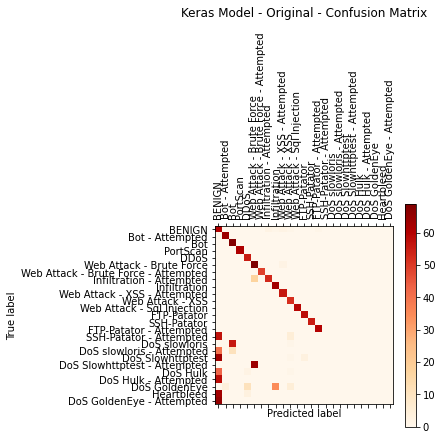

In [35]:
from sys import exit
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

loss, accuracy = model.evaluate(x_test,y_test)
print(f'Test loss:', {loss}) 
print(f'Test accuracy:', {accuracy*100})

predictions = model.predict(x_test)
print(predictions)
# rounded_predictions = predictions.round().astype(int)

# We don't need to round and get better results if we keep the decimal places
rounded_predictions = predictions * 100 

# rounded_predictions = predictions.round().astype(int)
print(rounded_predictions)
integer_predictions = []

print("-------")
for i in range(len(rounded_predictions)):

  arr = [rounded_predictions[i][0], rounded_predictions[i][1], rounded_predictions[i][2], 
        rounded_predictions[i][3], rounded_predictions[i][4], rounded_predictions[i][5], 
        rounded_predictions[i][6], rounded_predictions[i][7], rounded_predictions[i][8],
        rounded_predictions[i][9], rounded_predictions[i][10], rounded_predictions[i][11],
        rounded_predictions[i][12], rounded_predictions[i][13], rounded_predictions[i][14],
        ]

  # print(arr)
  HighestProbabilityClass = arr.index(max(arr))
  # print(HighestProbabilityClass)
  integer_predictions.append(HighestProbabilityClass)

print(integer_predictions)

print_classification_report(integer_predictions,y_test, "KerasOriginal.tex","Surrogate Model Classification Report")

# import matplotlib.pyplot as plt
# import numpy as np
# import itertools


# def plot_classification_report(classificationReport,
#                                title='Classification report',
#                                cmap='RdBu'):

#     classificationReport = classificationReport.replace('\n\n', '\n')
#     classificationReport = classificationReport.replace(' / ', '/')
#     lines = classificationReport.split('\n')

#     classes, plotMat, support, class_names = [], [], [], []
#     for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
#         t = line.strip().split()
#         if len(t) < 2:
#             continue
#         classes.append(t[0])
#         v = [float(x) for x in t[1: len(t) - 1]]
#         support.append(int(t[-1]))
#         class_names.append(t[0])
#         plotMat.append(v)

#     plotMat = np.array(plotMat)
#     xticklabels = ['Precision', 'Recall', 'F1-score']
#     yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
#                    for idx, sup in enumerate(support)]

#     plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
#     plt.title(title)
#     plt.colorbar()
#     plt.xticks(np.arange(3), xticklabels, rotation=45)
#     plt.yticks(np.arange(len(classes)), yticklabels)

#     upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
#     lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
#     for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
#         plt.text(j, i, format(plotMat[i, j], '.2f'),
#                  horizontalalignment="center",
#                  color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

#     plt.ylabel('Metrics')
#     plt.xlabel('Classes')
#     plt.tight_layout()


# plot_classification_report(sample)

cm = confusion_matrix(y_test,integer_predictions)
plot_cm(cm,'Keras Model - Original - Confusion Matrix','ConfusionMatrix-Keras-Original.png')

#plot_cluster(cm)

#cm = confusion_matrix(y_test,integer_predictions)

# print(cm)
# plt.matshow(cm, cmap="OrRd" )
# plt.title('Multiclass - Original - Confusion Matrix', pad=150)
# plt.colorbar()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# ax = plt.gca()
# from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
# l_col_list = list(outcome)
# ax.set_xticklabels([''] + l_col_list, rotation=90)
# ax.set_yticklabels([''] + l_col_list)

# savename='ConfusionMatrix-Multiclass-Original.png'
# basedir='mount/My Drive/Colab Notebooks/Figures/'
# filename=basedir+savename
# plt.savefig(filename,dpi=300)
# plt.show()

In [36]:
from sklearn.neural_network import MLPClassifier

skMLP = MLPClassifier(hidden_layer_sizes=(128,64,15),activation ='relu',solver='adam', max_iter=300, shuffle=False,random_state=1, verbose=False) # Converges around 1600 iters / Achieves similar accuracy to keras at 300 iters


history = skMLP.fit(
        x_train, y_train
)        

result = skMLP.score(x_test, y_test)
print(result)
print("Accuracy: %.2f%%" % (result*100.0))



0.8573333333333333
Accuracy: 85.73%


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
DO_LIME = 0

if(DO_LIME):
  import lime
  from lime import lime_tabular

  explainer = lime_tabular.LimeTabularExplainer(
      training_data=np.array(x_train),
      feature_names=subset.columns,
      class_names=outcome,
      mode='classification'
  )

  exp = explainer.explain_instance(
      data_row=x_test[1], 
      predict_fn=skMLP.predict_proba
  )

  exp.show_in_notebook(show_table=True)



In [38]:
predictions = skMLP.predict_proba(x_test)
print(predictions)
rounded_predictions = predictions.round().astype(int)
rounded_prediction = predictions * 100
print(rounded_predictions)
integer_predictions = []

print("-------")
for i in range(len(rounded_predictions)):

  arr = [rounded_predictions[i][0], rounded_predictions[i][1], rounded_predictions[i][2], 
        rounded_predictions[i][3], rounded_predictions[i][4], rounded_predictions[i][5], 
        rounded_predictions[i][6], rounded_predictions[i][7], rounded_predictions[i][8],
        rounded_predictions[i][9], rounded_predictions[i][10], rounded_predictions[i][11],
        rounded_predictions[i][12], rounded_predictions[i][13], rounded_predictions[i][14],
        ]

  # print(arr)
  HighestProbabilityClass = arr.index(max(arr))
  # print(HighestProbabilityClass)
  integer_predictions.append(HighestProbabilityClass)

print(integer_predictions)
# print(len(integer_predictions))


# results = model.evaluate(x_test, y_test)

# # print(y_test)
# print(len(y_test))

# print("----- NORMAL test loss, test acc:", results)
# print(predictions)
# OneHotEncoded_y_test = to_categorical(y_test)
# print(OneHotEncoded_y_test)
# print(len(OneHotEncoded_y_test))
# rounded_predictions = predictions.round().astype(int)
# integer_predictions = []
# for i in range(len(rounded_predictions)):
#   print(1)

[[1.39442785e-007 1.78992478e-110 2.33947455e-039 ... 3.11732269e-048
  2.38511052e-055 2.99129448e-019]
 [3.11222764e-005 1.02983753e-013 1.37458355e-022 ... 2.65695029e-012
  1.38804537e-018 1.59377797e-009]
 [5.39967385e-005 5.10099572e-007 9.11178652e-010 ... 2.40901187e-014
  9.91362554e-023 2.26821959e-012]
 ...
 [8.85098628e-007 1.60874121e-081 7.16061220e-028 ... 3.08998028e-029
  2.64696367e-034 4.17390081e-016]
 [7.26912686e-004 1.45092158e-008 4.94821828e-008 ... 4.09424017e-005
  1.94879389e-016 6.95953417e-005]
 [2.83633973e-003 1.35662795e-031 9.03580764e-043 ... 5.88345313e-008
  1.44959155e-004 3.80339108e-014]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------
[7, 12, 13, 0, 3, 0, 0, 12, 12, 8, 12, 1, 4, 3, 0, 0, 0, 0, 8, 0, 4, 0, 0, 3, 0, 0, 0, 1, 0, 0, 9, 1, 0, 0, 8, 12, 0, 0, 0, 10, 0, 0, 0, 0, 4, 0, 0, 0, 0, 13, 0, 0, 12, 14, 0, 0, 0, 0, 8, 12, 11, 0, 0, 0, 0, 13, 0, 11, 0, 0, 9, 0, 1, 1,

In [39]:
targets = []
classes = transformed_label
#.unique gives the order of appearance and therefore does not sort.
print(classes)
new_order_classes = np.unique(Y_class)
print(new_order_classes)


print(classification_report(
    integer_predictions,
    y_test,
    target_names=outcome,
    labels=range(0,(len(outcome))))
)
print(y_test)

count_arr = np.bincount(y_test)
for i in range(0,len(outcome)):
  print(i, count_arr[i])


print_classification_report(integer_predictions,y_test, "SK-MLPOriginal.tex","Multiclass Original Classification Report")

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

[ 0  0  0 ... 24 24 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
                                      precision    recall  f1-score   support

                              BENIGN       0.96      0.08      0.14       819
                     Bot - Attempted       0.97      1.00      0.98        63
                                 Bot       0.00      0.00      0.00         0
                            PortScan       1.00      1.00      1.00        61
                                DDoS       0.98      1.00      0.99        54
            Web Attack - Brute Force       0.00      0.00      0.00         0
Web Attack - Brute Force - Attempted       1.00      1.00      1.00        49
            Infiltration - Attempted       0.76      0.98      0.85        54
                        Infiltration       0.97      0.97      0.97        63
        Web Attack - XSS - Attempted       1.00      0.97      0.98        58
                    Web Attack - XSS   

[[64  0  0  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 2 63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  0  0 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [69  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [17  0  0  0  0  0  0 53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 2  0  0  0  0  0  0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 5  0  0  0  0  0  0  0  1  0 46  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 59  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 58

<Figure size 6000x6000 with 0 Axes>

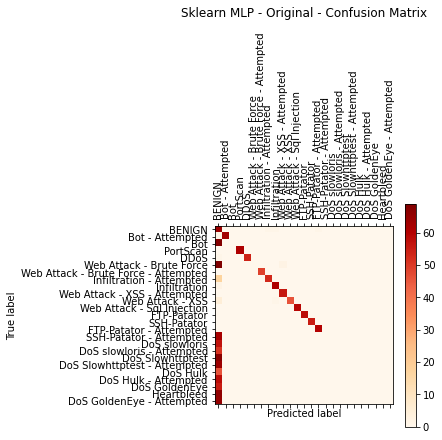

In [40]:
cm = confusion_matrix(y_test,integer_predictions)
plot_cm(cm,'Sklearn MLP - Original - Confusion Matrix','ConfusionMatrix-SkLearn-Original.png')

#plot_cluster(cm)

#cm = confusion_matrix(y_test,integer_predictions)

# print(cm)
# plt.matshow(cm, cmap="OrRd" )
# plt.title('Multiclass - Original - Confusion Matrix', pad=150)
# plt.colorbar()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# ax = plt.gca()
# from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
# l_col_list = list(outcome)
# ax.set_xticklabels([''] + l_col_list, rotation=90)
# ax.set_yticklabels([''] + l_col_list)

# savename='ConfusionMatrix-Multiclass-Original.png'
# basedir='mount/My Drive/Colab Notebooks/Figures/'
# filename=basedir+savename
# plt.savefig(filename,dpi=300)
# plt.show()


Plot Errors - skipped for the paper

In [41]:
DO_ERRORS = 0
if(DO_ERRORS):
  plot_errors(cm,'Multiclass - Original - Error Matrix','ErrorMatrix-Multiclass-Original.png')
# #Plot of errors
# row_sums = cm.sum(axis=1, keepdims=True)
# norm_cm = cm / row_sums

# np.fill_diagonal(norm_cm, 0)
# plt.matshow(norm_cm, cmap="OrRd")
# plt.title('Multiclass - Original - Error Matrix', pad=150)

# plt.colorbar()
# ax = plt.gca()
# from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
# l_col_list = list(outcome)
# ax.set_xticklabels([''] + l_col_list,rotation=90)
# ax.set_yticklabels([''] + l_col_list)

# savename='ErrorMatrix-Multiclass-Original.png'
# basedir='mount/My Drive/Colab Notebooks/Figures/'
# filename=basedir+savename
# plt.savefig(filename,dpi=300)

In [42]:
# Create the ART Classifier
art_classifier = KerasClassifier(model=model, use_logits=False)

In [43]:
# 0 - 14 labels =       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
#OHE_benign =            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0]
# 0 - 25 labels =       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
OHE_benign =            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]

targets=[]

for i in range(0,len(x_test)):
  targets.append(OHE_benign)
numpy_targets = np.array(targets)

#Generate FGSM Adversarial Examples

# attack = FastGradientMethod(estimator=art_classifier, eps=0.5)
# print("Generating FGSM")

# x_test_fgsm = attack.generate(x=x_test)
# print(x_test_fgsm)

# Theta = perturbation to each feature
# Gamma = float max fraction of features being perturbed
for theta in ([0.05]):
  for gamma in ([0.02]):

    # attack = SaliencyMapMethod(classifier=art_classifier, theta=0.1, gamma=0.1, batch_size=1,verbose=True) # Theta = Small Perturbation , Gamma = 10% of features

    attack = SaliencyMapMethod(classifier=art_classifier, theta=theta, gamma=gamma, batch_size=1,verbose=True) # Theta = Small Perturbation , Gamma = 10% of features
    print("Starting to Generate untargeted JSMA")
    #x_test_adv = attack.generate(x=x_test, y=oh_target_labels)
    x_test_jsma = attack.generate(x=x_test)
    # print(x_test_jsma)

    print("Starting to Generate Targeted JSMA")

    targeted_benign_x_test_jsma = attack.generate(x=x_test,y=numpy_targets)

    #Keep benign cases

    for i in range(0,len(x_test)):
      if(y_test[i] == 0):
        # x_test_fgsm[i] = x_test[i]
        x_test_jsma[i] = x_test[i]
        targeted_benign_x_test_jsma[i] = x_test[i]


    # Save x_test_jsma 

    savename='x_test_jsma-' + 'theta-' + str(theta) + 'gamma-'+ str(gamma) +'.npy'
    basedir='mount/My Drive/Colab Notebooks/Figures/'
    filename=basedir+savename
    print(f"Writing file {filename}")
    np.save(filename, x_test_jsma)

    savename='targeted_benign_jsma-'+ 'theta-' + str(theta) + 'gamma-'+ str(gamma) +'.npy'
    basedir='mount/My Drive/Colab Notebooks/Figures/'
    filename=basedir+savename
    print(f"Writing file {filename}")
    np.save(filename, targeted_benign_x_test_jsma)

Starting to Generate untargeted JSMA


JSMA:   0%|          | 0/1500 [00:00<?, ?it/s]

Starting to Generate Targeted JSMA


JSMA:   0%|          | 0/1500 [00:00<?, ?it/s]

Writing file mount/My Drive/Colab Notebooks/Figures/x_test_jsma-theta-0.05gamma-0.02.npy
Writing file mount/My Drive/Colab Notebooks/Figures/targeted_benign_jsma-theta-0.05gamma-0.02.npy


58


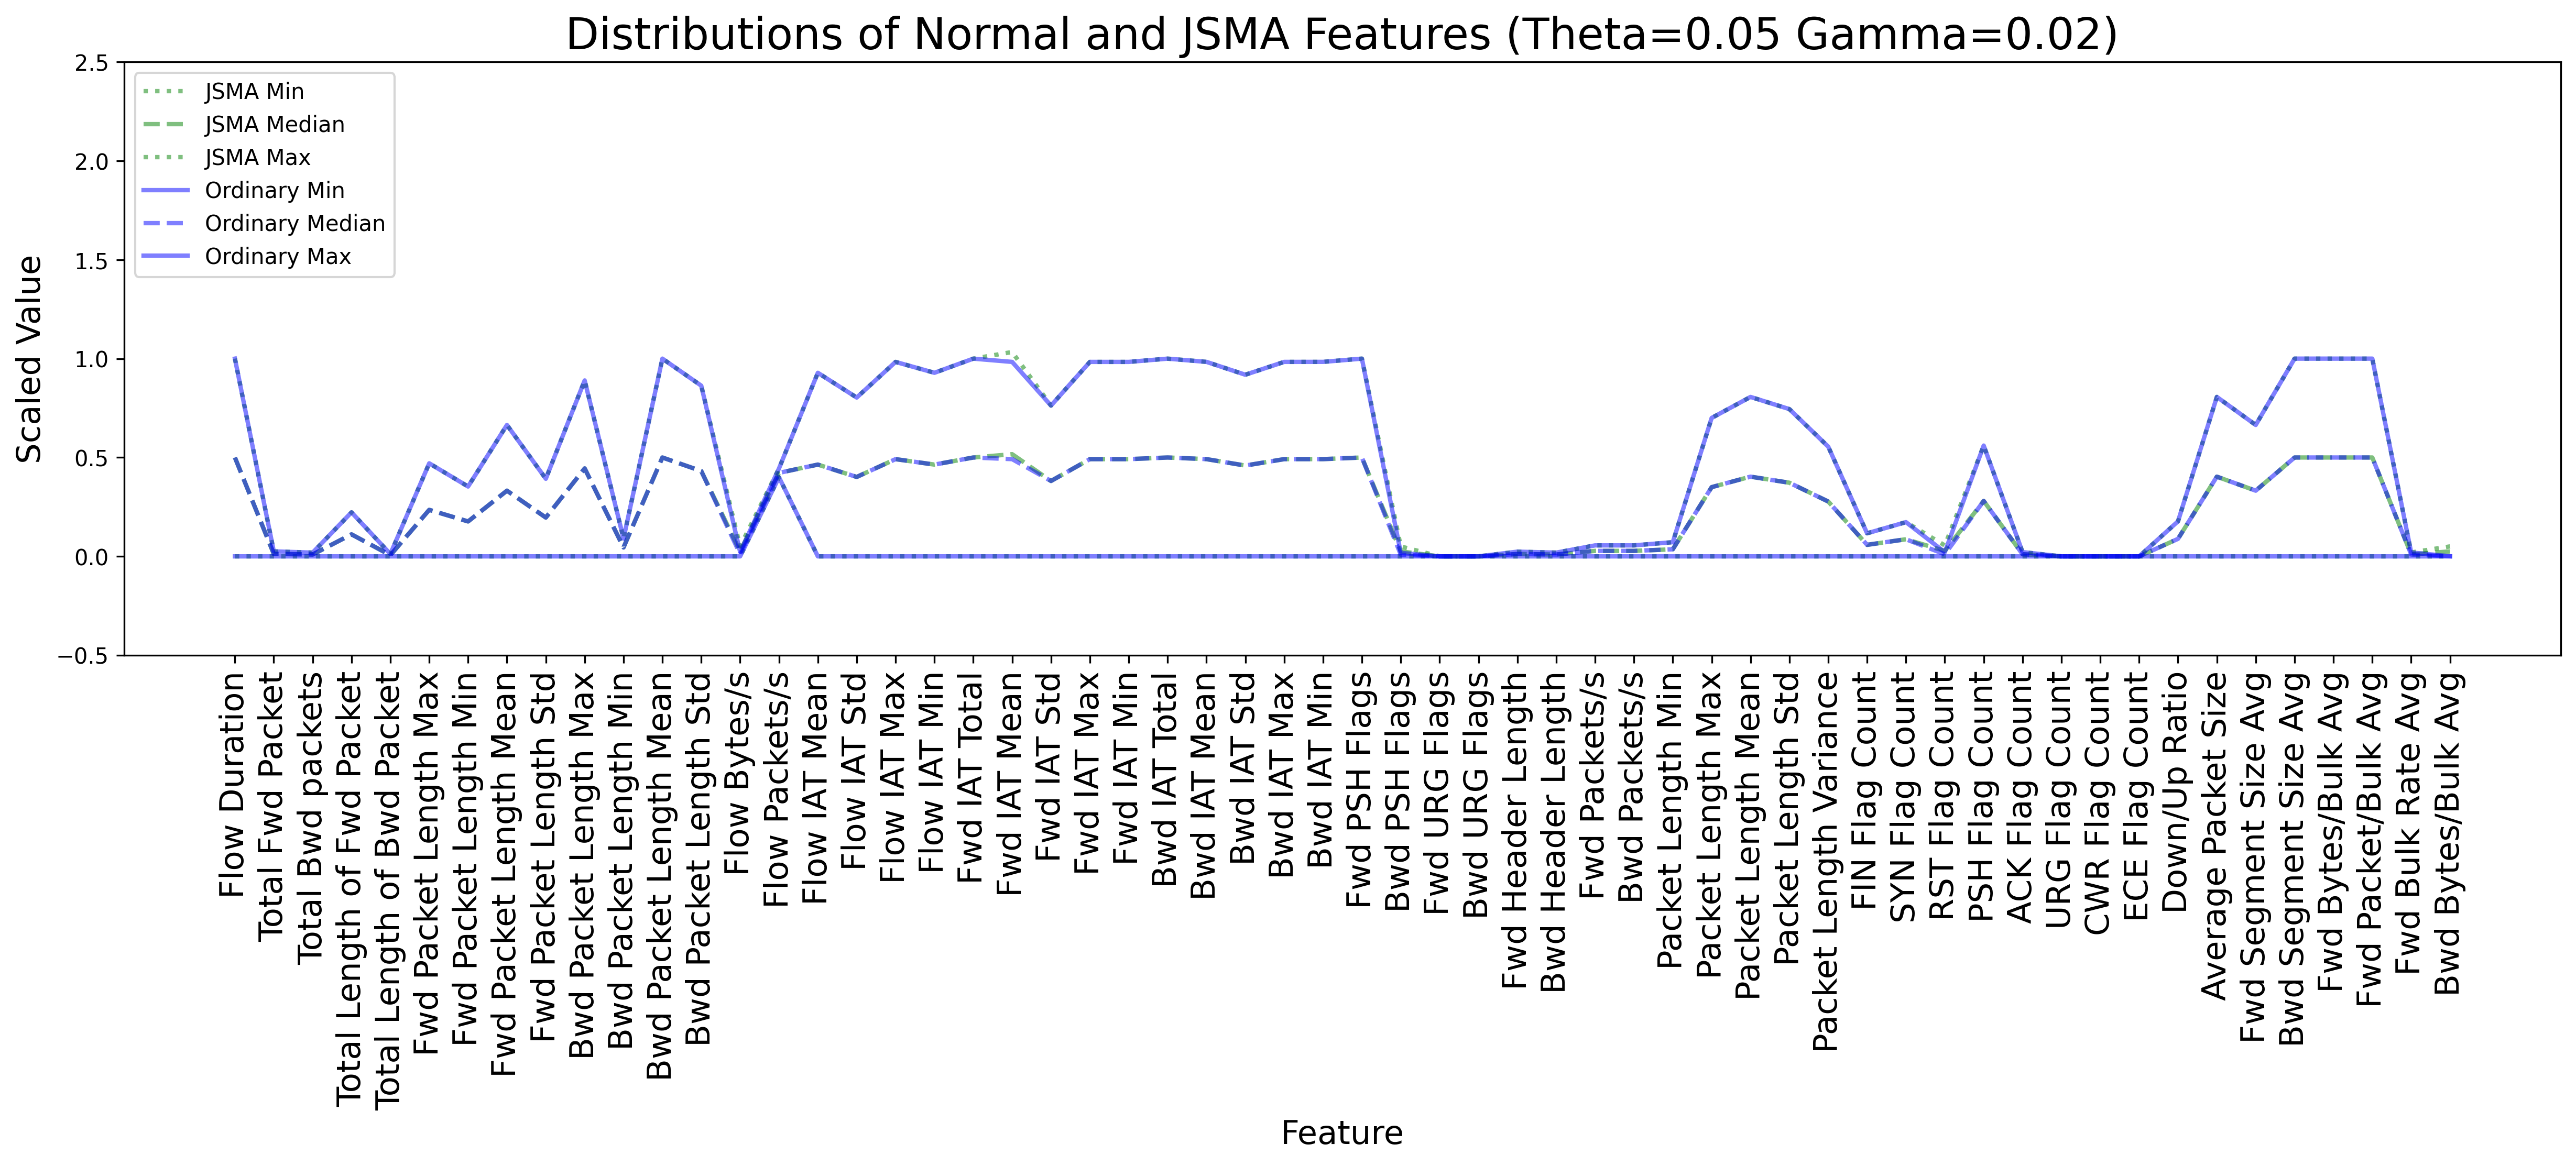

In [44]:
# for column in x_test.T:
#    print(column)

# a : numpy array from which it needs to find the maximum value.
# ...
# numpy. amax()
# If it's provided then it will return for array of max values along the axis i.e.
# If axis=0 then it returns an array containing max value for each columns.
# If axis=1 then it returns an array containing max value for each row.

x_test_feature_min_values = np.amin(x_test,axis=0)
x_test_feature_max_values = np.amax(x_test,axis=0)

x_test_jsma_feature_min_values = np.amin(x_test_jsma,axis=0)
x_test_jsma_feature_max_values = np.amax(x_test_jsma,axis=0)

benign_feature_min_values = np.amin(class0X,axis=0)
benign_feature_max_values = np.amax(class0X,axis=0)

# for i in range(0,len(x_test_feature_min_values)):
#   plt.plot(i,x_test_feature_min_values[i])
# plt.show


import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('_mpl-gallery')

# make data


numOfColumns = len(x_test_feature_min_values)
print(numOfColumns)
x = range(0,numOfColumns)
# x = range(0,len(x_test_feature_min_values))
y1 = x_test_feature_min_values
y2 = x_test_feature_max_values

y3 = x_test_jsma_feature_min_values
y4 = x_test_jsma_feature_max_values

y5 = benign_feature_min_values
y6 = benign_feature_max_values
# plot
# fig, ax = plt.subplots()

plt.figure(figsize=(20,5), dpi=300)


# p1 = plt.fill_between(x, y3, y4, facecolor ='lime',alpha=.5, hatch='.', label='JSMA Range', linewidth=0)
p1 = plt.plot(x, y3, alpha=0.5,linewidth=2, linestyle="dotted", label='JSMA Min', color='green')
p2 = plt.plot(x, (y3 + y4)/2, alpha=0.5,linewidth=2,linestyle="dashed", label='JSMA Median', color='green')
p3 = plt.plot(x, y4, alpha=0.5,linewidth=2, linestyle="dotted", label='JSMA Max', color='green')

# p3 = plt.fill_between(x, y1, y2,  facecolor='red', alpha=.5, hatch='/', label='Ordinary Range', linewidth=0)

p4 = plt.plot(x, y1,  alpha=0.5,linewidth=2, label='Ordinary Min', color='blue')
p5 = plt.plot(x, (y1 + y2)/2,  alpha=0.5,linewidth=2,linestyle="dashed", label='Ordinary Median', color='blue')
p6 = plt.plot(x, y2,  alpha=0.5,linewidth=2, label='Ordinary Max', color='blue')

# p3 = plt.fill_between(x, y1, y2,  facecolor='red', alpha=.5, hatch='/', label='Ordinary Range', linewidth=0)
# p4 = plt.plot(x, (y5 + y6)/2,  alpha=0.5,linewidth=2, label='BENIGN Mean', color='red')


# ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
# ax.plot(t, mu2, lw=2, label='mean population 2', color='yellow')

# ax.set(xlim=(0, 58), xticks=np.arange(0, 58),
#        ylim=(0, 2), yticks=np.arange(0, 2))

# plt.xticks(ticks = tickvalues ,labels = labellist, rotation = 'vertical')

plt.xticks(range(0,len(y1)), labels=subset.columns, rotation=90, fontsize=15)
plt.ylim((-0.5, 2.5))
      #  ylim=(0, 2), yticks=np.arange(0, 2))

title = 'Distributions of Normal and JSMA Features (Theta=' +str(theta) + ' Gamma=' +str(gamma) +')'
plt.title(title,fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Scaled Value',fontsize=15)


savename='Min-Max_Plot-'+'theta-'+str(theta)+'gamma'+str(gamma)+'.png'
# savename='AllMeans.png'
basedir='mount/My Drive/Colab Notebooks/Figures/MinMaxPlots/'
filename=basedir+savename
# plt.savefig(filename,dpi=300,bbox_inches='tight')

plt.show()
# fig, ax = plt.subplots()

# # ax.fill_between(x, y1, y2,  facecolor='blue', alpha=.5, linewidth=0)
# # ax.plot(x, (y1 + y2)/2,  alpha=.5,linewidth=2)

# ax.fill_between(x, y3, y4, facecolor ='yellow',alpha=.5, linewidth=0)
# ax.plot(x, (y3 + y4)/2, linewidth=2)

# ax.set(xlim=(0, 58), xticks=np.arange(0, 58),
#        ylim=(-3, 3), yticks=np.arange(0, 3))

# plt.show()


In [45]:
TARGETED = 0
if(TARGETED):
  x_test_jsma = targeted_benign_x_test_jsma
else:
  pass
# Evaluate ART Classifier on adversarial test examples

# fgsm_predictions = model.predict(x_test_fgsm)
# # print(fgsm_predictions)
# rounded_fgsm_predictions = fgsm_predictions.round().astype(int)
# # print(rounded_fgsm_predictions)

# fgsm_results = model.evaluate(x_test_fgsm, y_test)
# print("------ FGSM test loss, test acc:", fgsm_results)

#---- JSMA
keras_jsma_predictions = model.predict(x_test_jsma)
skmlp_jsma_predictions = skMLP.predict_proba(x_test_jsma)
integer_jsma_predictions = []
# print(jsma_predictions)
keras_rounded_jsma_predictions = keras_jsma_predictions.round().astype(int)
skmlp_rounded_jsma_predictions = skmlp_jsma_predictions.round().astype(int)
# rounded_jsma_predictions = jsma_predictions * 100
# print(rounded_jsma_predictions)



jsma_results = model.evaluate(x_test_jsma, y_test)
print("------ JSMA test loss, test acc:", jsma_results)

skMLP.score(x_test_jsma,y_test)

# print(rounded_fgsm_predictions)
# print(y_test)
OHE_y_test = to_categorical(y_test)
# print(OHE_y_test)
print("--- FGSM Classification Report ---")
# print(classification_report(
#       rounded_fgsm_predictions,
#       OHE_y_test,
#       target_names=outcome,
#       labels=range(0,(len(outcome))))
# )

# fgsm_class_report = classification_report(
#       rounded_fgsm_predictions,
#       OHE_y_test,
#       target_names=outcome,
#       labels=range(0,(len(outcome))),output_dict=True)
# fgsm_class_report_df = pd.DataFrame(fgsm_class_report) #.transponse

# with open(basedir + 'multiclass_fgsm_class_report.tex', 'w') as f:
#   f.write(fgsm_class_report_df.to_latex(caption="FGSM Multiclass Classification Report"))

# print_classification_report(rounded_fgsm_predictions,OHE_y_test,'multiclass_fgsm_class_report.tex','FGSM Multiclass Classification Report')


print("--- JSMA Classification Report ---")
# print(classification_report(
#       rounded_jsma_predictions,
#       OHE_y_test,
#       target_names=outcome,
#       labels=range(0,(len(outcome))))
# )

# jsma_class_report = classification_report(
#       rounded_jsma_predictions,
#       OHE_y_test,
#       target_names=outcome,
#       labels=range(0,(len(outcome))),output_dict=True)
# jsma_class_report_df = pd.DataFrame(jsma_class_report) #.transponse

# with open(basedir + 'multiclass_jsma_class_report.tex', 'w') as f:
#   f.write(jsma_class_report_df.to_latex(caption="JSMA Multiclass Classification Report"))

if(TARGETED):
  print_classification_report(keras_rounded_jsma_predictions,OHE_y_test,'keras_TARGETED_jsma_class_report.tex','Keras Targeted JSMA Multiclass Classification Report')
  print_classification_report(skmlp_rounded_jsma_predictions,OHE_y_test,'skmlp_TARGETED_jsma_class_report.tex','SKlearn MLP Targeted JSMA Multiclass Classification Report')

else: 
  print_classification_report(keras_rounded_jsma_predictions,OHE_y_test,'keras_UNTARGETED_jsma_class_report.tex','Keras JSMA Multiclass Classification Report')
  print_classification_report(skmlp_rounded_jsma_predictions,OHE_y_test,'skmlp_UNTARGETED_jsma_class_report.tex','SKlearn MLP JSMA Multiclass Classification Report')


------ JSMA test loss, test acc: [10.414595087687175, 0.344]
--- FGSM Classification Report ---
--- JSMA Classification Report ---
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                                      precision    recall  f1-score   support

                              BENIGN       0.85      0.34      0.49       167
                     Bot - Attempted       0.05      1.00      0.09         3
                                 Bot       0.00      0.00      0.00         0
                            PortScan       0.00      0.00      0.00         0
                                DDoS       0.95      0.47      0.63       110
            Web Attack - Brute Force       0.00      0.00      0.00         0
Web Attack - Brute Force - Attempted       0.0

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.

In [46]:
# integer_fgsm_predictions = []
# print(rounded_fgsm_predictions)
# for i in range(len(rounded_fgsm_predictions)):

#   arr = [rounded_fgsm_predictions[i][0], rounded_fgsm_predictions[i][1], rounded_fgsm_predictions[i][2], 
#         rounded_fgsm_predictions[i][3], rounded_fgsm_predictions[i][4], rounded_fgsm_predictions[i][5], 
#         rounded_fgsm_predictions[i][6], rounded_fgsm_predictions[i][7], rounded_fgsm_predictions[i][8],
#         rounded_fgsm_predictions[i][9], rounded_fgsm_predictions[i][10], rounded_fgsm_predictions[i][11],
#         rounded_fgsm_predictions[i][12], rounded_fgsm_predictions[i][13], rounded_fgsm_predictions[i][14],
#         ]

#   # print(arr)
#   HighestProbabilityClass = arr.index(max(arr))
#   # print(HighestProbabilityClass)
#   integer_fgsm_predictions.append(HighestProbabilityClass)

# print(integer_fgsm_predictions)

# cm = confusion_matrix(y_test,integer_fgsm_predictions)
# plot_cm(cm,'Multiclass - FGSM - Confusion Matrix','ConfusionMatrix-Multiclass-FGSM.png')
# plot_errors(cm,'Multiclass - FGSM - Error Matrix','ErrorMatrix-Multiclass-FGSM.png')


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<Figure size 6000x6000 with 0 Axes>

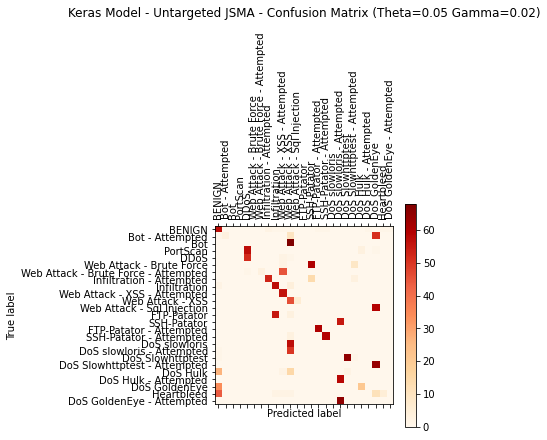

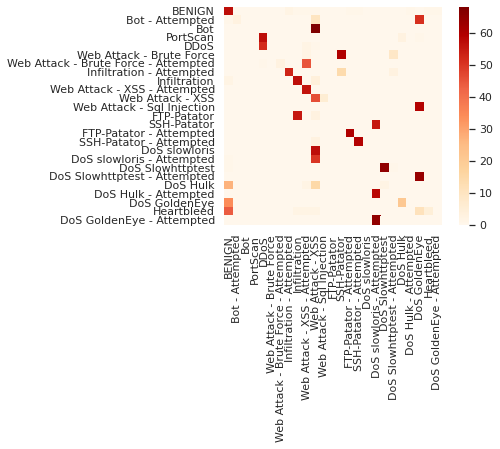

[[60  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  0  0  0  0  0  1  0  1
   1]
 [52  3  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 4  0  0  8 43  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
   0]
 [ 8  0  0  4 43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  2  0  0  0  9  0  0  0  0  0  0 60  0  0  0  0  0
   0]
 [ 6  0  0  3  0  0 10  0  0 11 19  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 53  0  0  0  3  0  0  0  0  0  0 14  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0
   0]
 [ 0  0  0  0  0  0  0 41  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  0  0  0  0  0  1  2  0 42  0  0  0  0  0  0  6  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 57  0  0  0  0  0  0  2  0
   0]
 [56  0  0  0  0  0  0  0  0  0  0  0  0

<Figure size 6000x6000 with 0 Axes>

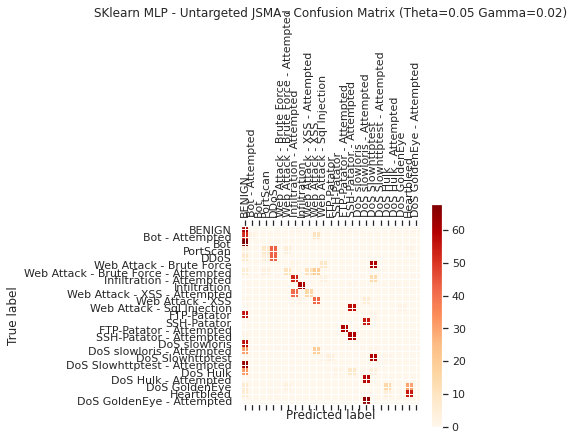

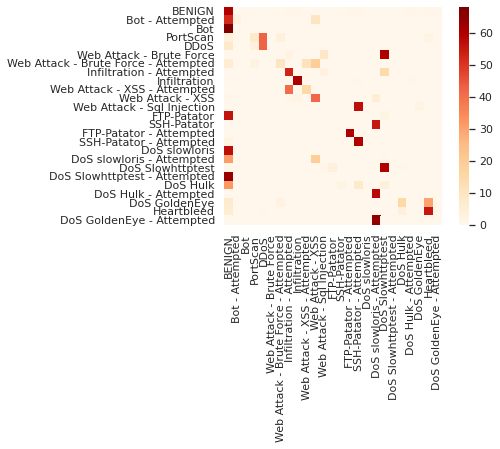

In [47]:
keras_integer_jsma_predictions = []
skmlp_integer_jsma_predictions = []
# --- Do Keras
print(keras_rounded_jsma_predictions)
for i in range(len(keras_rounded_jsma_predictions)):

  arr = [keras_rounded_jsma_predictions[i][0], 
         keras_rounded_jsma_predictions[i][1], 
         keras_rounded_jsma_predictions[i][2], 
         keras_rounded_jsma_predictions[i][3], 
         keras_rounded_jsma_predictions[i][4], 
         keras_rounded_jsma_predictions[i][5], 
         keras_rounded_jsma_predictions[i][6], 
         keras_rounded_jsma_predictions[i][7], 
         keras_rounded_jsma_predictions[i][8],
         keras_rounded_jsma_predictions[i][9], 
         keras_rounded_jsma_predictions[i][10], 
         keras_rounded_jsma_predictions[i][11],
         keras_rounded_jsma_predictions[i][12], 
         keras_rounded_jsma_predictions[i][13], 
         keras_rounded_jsma_predictions[i][14],
         keras_rounded_jsma_predictions[i][15], 
         keras_rounded_jsma_predictions[i][16], 
         keras_rounded_jsma_predictions[i][17], 
         keras_rounded_jsma_predictions[i][18], 
         keras_rounded_jsma_predictions[i][19], 
         keras_rounded_jsma_predictions[i][20],
         keras_rounded_jsma_predictions[i][21], 
         keras_rounded_jsma_predictions[i][22], 
         keras_rounded_jsma_predictions[i][23],
         keras_rounded_jsma_predictions[i][24], 
          
        ]

  print(arr)
  Keras_HighestProbabilityClass = arr.index(max(arr))
  # print(HighestProbabilityClass)
  keras_integer_jsma_predictions.append(Keras_HighestProbabilityClass)

print(keras_integer_jsma_predictions)
# ---- Now do SKLearn
print(skmlp_rounded_jsma_predictions)
for i in range(len(skmlp_rounded_jsma_predictions)):

  arr = [skmlp_rounded_jsma_predictions[i][0], 
        skmlp_rounded_jsma_predictions[i][1],
        skmlp_rounded_jsma_predictions[i][2], 
        skmlp_rounded_jsma_predictions[i][3], 
        skmlp_rounded_jsma_predictions[i][4], 
        skmlp_rounded_jsma_predictions[i][5], 
        skmlp_rounded_jsma_predictions[i][6], 
        skmlp_rounded_jsma_predictions[i][7], 
        skmlp_rounded_jsma_predictions[i][8],
        skmlp_rounded_jsma_predictions[i][9], 
        skmlp_rounded_jsma_predictions[i][10], 
        skmlp_rounded_jsma_predictions[i][11],
        skmlp_rounded_jsma_predictions[i][12], 
        skmlp_rounded_jsma_predictions[i][13], 
        skmlp_rounded_jsma_predictions[i][14],
        skmlp_rounded_jsma_predictions[i][15], 
        skmlp_rounded_jsma_predictions[i][16],
        skmlp_rounded_jsma_predictions[i][17], 
        skmlp_rounded_jsma_predictions[i][18], 
        skmlp_rounded_jsma_predictions[i][19],
        skmlp_rounded_jsma_predictions[i][20], 
        skmlp_rounded_jsma_predictions[i][21],
        skmlp_rounded_jsma_predictions[i][22], 
        skmlp_rounded_jsma_predictions[i][23], 
        skmlp_rounded_jsma_predictions[i][24],
      ]

  # print(arr)
  skmlp_HighestProbabilityClass = arr.index(max(arr))
  # print(HighestProbabilityClass)
  skmlp_integer_jsma_predictions.append(skmlp_HighestProbabilityClass)

print(skmlp_integer_jsma_predictions)


cm = confusion_matrix(y_test,keras_integer_jsma_predictions)
#cm = confusion_matrix(y_test,integer_predictions)

if(TARGETED):
  plot_cm_theta(cm,'Keras Model - Targeted JSMA - Confusion Matrix','ConfusionMatrix-Keras-TARGETED-JSMA.png')

  # plot_errors(cm,'Multiclass - Targeted JSMA - Error Matrix','ErrorMatrix-Multiclass-JSMA.png')

  cm = confusion_matrix(y_test,skmlp_integer_jsma_predictions)
  plot_cm_theta(cm,'SKlearn MLP - Targeted JSMA - Confusion Matrix','ConfusionMatrix-SKMLP-TARGETED-JSMA.png')
  
else:

  plot_cm_theta(cm,'Keras Model - Untargeted JSMA - Confusion Matrix','ConfusionMatrix-Keras-UNTARGETED-JSMA.png')

  # plot_errors(cm,'Multiclass - Untargeted JSMA - Error Matrix','ErrorMatrix-Multiclass-JSMA.png')

  cm = confusion_matrix(y_test,skmlp_integer_jsma_predictions)
  plot_cm_theta(cm,'SKlearn MLP - Untargeted JSMA - Confusion Matrix','ConfusionMatrix-SKMLP-UNTARGETED-JSMA.png')



In [48]:
normal_count_arr = np.bincount(y_test)

for i in range(0,24):
  print(f"{i} : {normal_count_arr[i]}")
print("-----------")

jsma_count_arr = np.bincount(keras_integer_jsma_predictions)
for i in range(0,24):
  print(f"{i} : {jsma_count_arr[i]}")

matches = []

for i in range (0,len(y_test)):
  if(y_test[i] == keras_integer_jsma_predictions[i]):
    # print(f"Match for {y_test[i]}")
    matches.append(y_test[i])

  else:
    # print(f"No Match for {y_test[i]}")
    matches.append(20*y_test[i])

print("-----------")
matches_count_arr = np.bincount(matches)
list_of_lists = []
# my_df = pd.DataFrame(columns=['Traffic Type','Original Instances','Perturbed but Correctly Classified', 'Percentage Correctly Classified'])
for i in range(0,15):
  print(f"{outcome[i]} : \t{normal_count_arr[i]} \t{matches_count_arr[i]}  \t{matches_count_arr[i]/normal_count_arr[i]*100}")
  list_of_lists.append([outcome[i],normal_count_arr[i],matches_count_arr[i],(100-(matches_count_arr[i]/normal_count_arr[i]*100))])
  my_df = pd.DataFrame(list_of_lists, columns=['Traffic Type','Original','Correct after JSMA', 'Successful Attack Percentage'])
my_df = my_df.sort_values('Successful Attack Percentage', ascending=False)
my_df = my_df.round(decimals=2)
print(my_df)
print(my_df.to_latex())


0 : 67
1 : 65
2 : 68
3 : 61
4 : 55
5 : 71
6 : 49
7 : 70
8 : 63
9 : 56
10 : 52
11 : 59
12 : 58
13 : 55
14 : 60
15 : 62
16 : 57
17 : 51
18 : 67
19 : 64
20 : 46
21 : 58
22 : 55
23 : 66
-----------
0 : 167
1 : 3
2 : 0
3 : 0
4 : 110
5 : 0
6 : 3
7 : 55
8 : 115
9 : 110
10 : 260
11 : 6
12 : 0
13 : 74
14 : 61
15 : 60
16 : 0
17 : 178
18 : 67
19 : 13
20 : 24
21 : 1
22 : 186
23 : 6
-----------
BENIGN : 	67 	67  	100.0
Bot - Attempted : 	65 	3  	4.615384615384616
Bot : 	68 	0  	0.0
PortScan : 	61 	0  	0.0
DDoS : 	55 	52  	94.54545454545455
Web Attack - Brute Force : 	71 	0  	0.0
Web Attack - Brute Force - Attempted : 	49 	3  	6.122448979591836
Infiltration - Attempted : 	70 	53  	75.71428571428571
Infiltration : 	63 	57  	90.47619047619048
Web Attack - XSS - Attempted : 	56 	56  	100.0
Web Attack - XSS : 	52 	46  	88.46153846153845
Web Attack - Sql Injection : 	59 	0  	0.0
FTP-Patator : 	58 	0  	0.0
SSH-Patator : 	55 	0  	0.0
FTP-Patator - Attempted : 	60 	60  	100.0
                            Tra

In [49]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(skMLP)
ovr.fit(x_train,y_train)




# keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model)
# keras_clf._estimator_type = "classifier"

# keras_shallow_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_shallow)
# keras_shallow_clf._estimator_type = "classifier"

# keras_dropout_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_dropout)
# keras_dropout_clf._estimator_type = "classifier"

# keras_dropout1_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_dropout1)
# keras_dropout1_clf._estimator_type = "classifier"

# keras_dropout2_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_dropout2)
# keras_dropout2_clf._estimator_type = "classifier"

# keras_dropout3_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_dropout3)
# keras_dropout3_clf._estimator_type = "classifier"

# keras_deeper_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_deeper)
# keras_deeper_clf._estimator_type = "classifier"

# keras_deeper_dropout_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_deeper_dropout)
# keras_deeper_dropout_clf._estimator_type = "classifier"

# keras_V_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_V)
# keras_V_clf._estimator_type = "classifier"

# keras_A_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model_A)
# keras_A_clf._estimator_type = "classifier"

# ovr = OneVsRestClassifier(keras_clf)
# ovr.fit(x_train,y_train)
# ovrdropout = OneVsRestClassifier(keras_dropout_clf)
# ovrdropout.fit(x_train,y_train)

print("Get the predictions")

ovr_predictions = ovr.predict(x_test)

print(ovr_predictions)
print(y_test)

# print(classification_report(
#         ovr_predictions,y_test,
#         target_names=outcome,
#         labels=range(0,(len(outcome)))))

# OVR_CLASS_REPORT = classification_report(
#         ovr_predictions,y_test,
#         target_names=outcome,
#         labels=range(0,(len(outcome))),output_dict=True
#     )

# print(OVR_CLASS_REPORT)

# ovr_class_report_df = pd.DataFrame(OVR_CLASS_REPORT)
# filename= basedir + 'multiclass_OvR_class_report.tex'
# print(ovr_class_report_df.to_latex(caption="OvR Multiclass Classification Report"))
# with open(filename, 'w') as f:
#   f.write(ovr_class_report_df.to_latex(caption="OvR Classification Report"))

print_classification_report(ovr_predictions,y_test,'multiclass_OvR_class_report.tex','OvR Classification Report')


Get the predictions
[ 7 12 13 ...  9 11  9]
[ 7 12 13 ...  9 11  9]
[ 7 12 13 ...  9 11  9]
[ 7 12 13 ...  9 11  9]
                                      precision    recall  f1-score   support

                              BENIGN       0.91      0.97      0.94        63
                     Bot - Attempted       0.98      1.00      0.99        64
                                 Bot       1.00      0.54      0.70       125
                            PortScan       1.00      1.00      1.00        61
                                DDoS       0.96      0.98      0.97        54
            Web Attack - Brute Force       0.97      0.80      0.88        86
Web Attack - Brute Force - Attempted       1.00      1.00      1.00        49
            Infiltration - Attempted       0.76      0.98      0.85        54
                        Infiltration       0.98      1.00      0.99        62
        Web Attack - XSS - Attempted       1.00      0.97      0.98        58
                    Web A

[[61  0  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  2  0  1
   0]
 [ 1 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
   0]
 [ 0  0  0  0  0 69  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 17  0 53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 62  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 51  0  0  0  0  0  0  0  0  0  1  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 59  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 58

<Figure size 6000x6000 with 0 Axes>

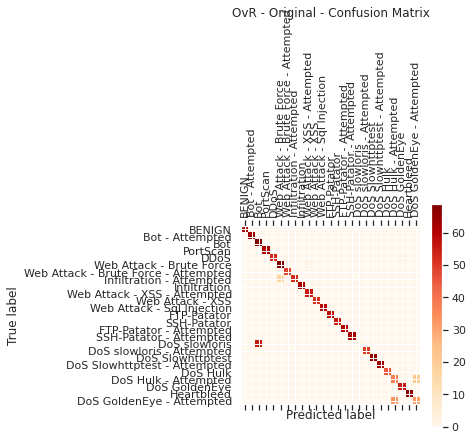

<Figure size 6000x6000 with 0 Axes>

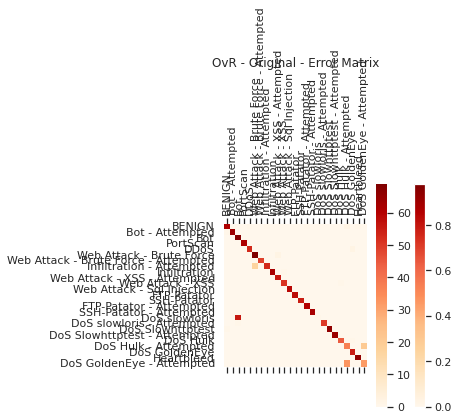

In [50]:
cm = confusion_matrix(y_test,ovr_predictions)
#cm = confusion_matrix(y_test,integer_predictions)
plot_cm(cm,'OvR - Original - Confusion Matrix','ConfusionMatrix-Multiclass-OvR.png')
plot_errors(cm,'OvR - Original - Error Matrix','ErrorMatrix-Multiclass-OvR.png')


In [51]:
# ovr_fgsm_predictions = ovr.predict(x_test_fgsm)
ovr_jsma_predictions = ovr.predict(x_test_jsma)




In [52]:
# cm = confusion_matrix(y_test,ovr_fgsm_predictions)
#cm = confusion_matrix(y_test,integer_predictions)

# plot_cm(cm,'OvR - FGSM - Confusion Matrix','ConfusionMatrix-OvR-FGSM.png')
# plot_errors(cm,'OvR - FGSM - Error Matrix','ErrorMatrix-OvR-FGSM.png')


[ 7 12 17 ...  9 10  9]
[ 7 12 13 ...  9 11  9]
                                      precision    recall  f1-score   support

                              BENIGN       0.91      0.28      0.42       221
                     Bot - Attempted       0.08      1.00      0.14         5
                                 Bot       0.00      0.00      0.00         0
                            PortScan       0.82      1.00      0.90        50
                                DDoS       1.00      0.98      0.99        56
            Web Attack - Brute Force       0.00      0.00      0.00         0
Web Attack - Brute Force - Attempted       1.00      0.78      0.88        63
            Infiltration - Attempted       0.76      0.98      0.85        54
                        Infiltration       0.98      1.00      0.99        62
        Web Attack - XSS - Attempted       1.00      0.97      0.98        58
                    Web Attack - XSS       0.85      0.11      0.19       406
          Web A

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

<Figure size 6000x6000 with 0 Axes>

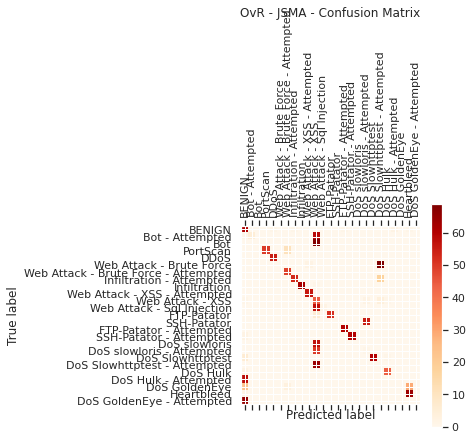

<Figure size 6000x6000 with 0 Axes>

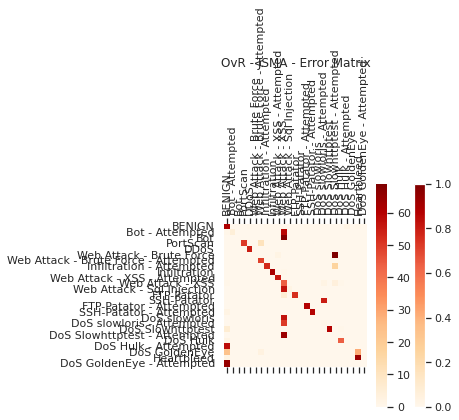

In [53]:
print_classification_report(ovr_jsma_predictions,y_test,'multiclass_OvR_class_report.tex','OvR Classification Report')

cm = confusion_matrix(y_test,ovr_jsma_predictions)
plot_cm(cm,'OvR - JSMA - Confusion Matrix','ConfusionMatrix-OvR-JSMA.png')
plot_errors(cm,'OvR - JSMA - Error Matrix','ErrorMatrix-OvR-JSMA.png')


Plot confusion matrices for individual models


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[ 7 12 13 ...  9 11  9]
0.24293604787190756 0.9026667
[[60  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  0  0  0  0  0  1  0  1
   1]
 [ 1 63  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0
   0]
 [ 0  0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  0  0 10  0  0  0  2  0  0  0  0  0  0  0  0  0 59  0  0  0  0
   0]
 [ 0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 53  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 2  0  0  0  0  0  0  0  1  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 59  0  0  0  0  0  0  0  0  0  

<Figure size 6000x6000 with 0 Axes>

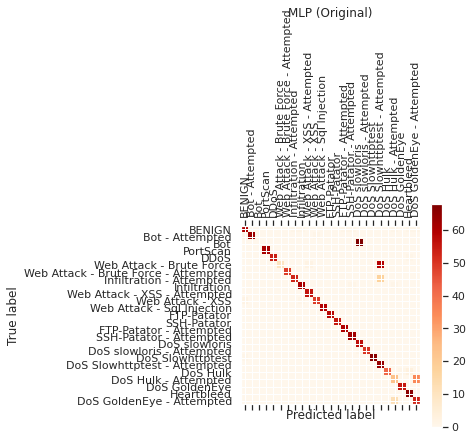

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

[ 7 12 13 ...  9 11  9]
[ 7 12 13 ...  9 11  9]
                                      precision    recall  f1-score   support

                              BENIGN       0.90      0.94      0.92        64
                     Bot - Attempted       0.97      1.00      0.98        63
                                 Bot       0.00      0.00      0.00         0
                            PortScan       1.00      1.00      1.00        61
                                DDoS       0.98      1.00      0.99        54
            Web Attack - Brute Force       0.14      1.00      0.25        10
Web Attack - Brute Force - Attempted       1.00      1.00      1.00        49
            Infiltration - Attempted       0.76      0.98      0.85        54
                        Infiltration       0.97      0.97      0.97        63
        Web Attack - XSS - Attempted       1.00      0.97      0.98        58
                    Web Attack - XSS       0.94      0.98      0.96        50
          Web A

<Figure size 6000x6000 with 0 Axes>

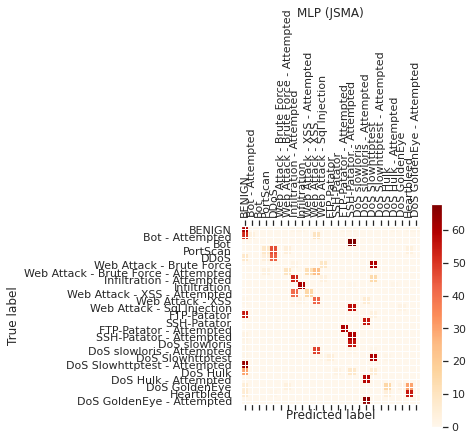

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

[ 7  0 17 ...  7 15  9]
[ 7 12 13 ...  9 11  9]
                                      precision    recall  f1-score   support

                              BENIGN       0.90      0.21      0.34       286
                     Bot - Attempted       0.05      1.00      0.09         3
                                 Bot       0.00      0.00      0.00         0
                            PortScan       0.13      0.53      0.21        15
                                DDoS       0.78      0.48      0.59        90
            Web Attack - Brute Force       0.00      0.00      0.00         0
Web Attack - Brute Force - Attempted       0.20      0.59      0.30        17
            Infiltration - Attempted       0.76      0.54      0.63        98
                        Infiltration       0.97      0.95      0.96        64
        Web Attack - XSS - Attempted       0.27      0.56      0.36        27
                    Web Attack - XSS       0.81      0.34      0.48       124
          Web A

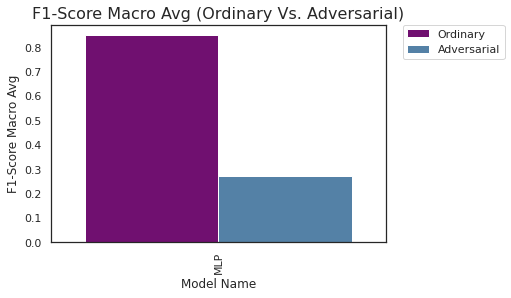

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier


original_f1_macros = []
jsma_f1_macros = []

#prepare algorithms to test
models = []
# models.append(('Keras Model',keras_clf))
# models.append(('NB', MultinomialNB()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors = 10)))
# models.append(('LR', LogisticRegression()))
# models.append(('SVC', SVC(C=10, gamma=0.001))) #model is tuned using
#GridSearch (code in seperate file)
# models.append(('DT', tree.DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier(bootstrap=True, n_jobs=2, verbose=True, max_features=20, n_estimators=170, max_depth=None,min_samples_split=5, random_state=7)))
# models.append(('AdaBoost', AdaBoostClassifier()))
# models.append(('XGBoost',XGBClassifier()))
# models.append(('QDA', QuadraticDiscriminantAnalysis()))
# models.append(('HBBC',HistGradientBoostingClassifier()))
# models.append(('LGBM',LGBMClassifier()))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(128,64,15),activation ='relu',solver='adam', max_iter=300, shuffle=False,random_state=1, verbose=False))) # Converges around 1600 iters / Achieves similar accuracy to keras at 300 iters


#evaluate each algorithm
results = []
names = []
for name, current_model in models:
  names.append(name)
  current_model.fit(x_train, y_train)
  orig_predictions = current_model.predict(x_test)
  print(orig_predictions)
  loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
  print(loss, accuracy)
  if(name=='Kerasy Model'):
    predictions = current_model.predict(x_test)
    print(predictions)
    # rounded_predictions = predictions.round().astype(int)
    # print(rounded_predictions)
    # integer_predictions = []

    # print("-------")
    # for i in range(len(rounded_predictions)):

    #   arr = [rounded_predictions[i][0], rounded_predictions[i][1], rounded_predictions[i][2], 
    #         rounded_predictions[i][3], rounded_predictions[i][4], rounded_predictions[i][5], 
    #         rounded_predictions[i][6], rounded_predictions[i][7], rounded_predictions[i][8],
    #         rounded_predictions[i][9], rounded_predictions[i][10], rounded_predictions[i][11],
    #         rounded_predictions[i][12], rounded_predictions[i][13], rounded_predictions[i][14],
    #         ]

    #   # print(arr)
    #   HighestProbabilityClass = arr.index(max(arr))
    #   # print(HighestProbabilityClass)
    #   integer_predictions.append(HighestProbabilityClass)

    print(predictions)
    cm = confusion_matrix(y_test,predictions)
    plot_cm(cm,str(name) + ' (Original)',str(name) + '-Original.png')

    jsma_predictions = current_model.predict(x_test_jsma)
    print(jsma_predictions)
    print(jsma_predictions)
    cm = confusion_matrix(y_test,jsma_predictions)
    plot_cm(cm,str(name) + ' (JSMA)',str(name) + '-JSMA.png')

  else:
    cm = confusion_matrix(y_test,orig_predictions)
    plot_cm(cm,str(name) + ' (Original)',str(name) + '-Original.png')
    DICT = classification_report(
        orig_predictions,y_test,
        # target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )
    original_f1_macros.append(DICT['macro avg']['f1-score'])
    print_classification_report(orig_predictions, y_test, 'class_report_' + str(name) +'-Original.tex', str(name) + 'Classification Report (Original)')

    jsma_predictions = current_model.predict(x_test_jsma)
    cm = confusion_matrix(y_test,jsma_predictions)
    plot_cm(cm,str(name) + ' (JSMA)',str(name) + '-JSMA.png')
    DICT = classification_report(
        jsma_predictions,y_test,
        # target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )
    jsma_f1_macros.append(DICT['macro avg']['f1-score'])
    print_classification_report(jsma_predictions, y_test, 'class_report_' + str(name) +'-JSMA.tex', str(name) + 'Classification Report (JSMA)')

# print("Name, original f1_macro, JSMA f1 macro")
# for i in range(0,len(names)):
# print(names[i],original_f1_macros[i],jsma_f1_macros[i])

robustness_df = pd.DataFrame(np.column_stack([names, original_f1_macros, jsma_f1_macros]), 
                               columns=['Model Name', 'Original F1-Score Macro Avg', 'Adversarial F1-Score Macro Avg'])

robustness_df[["Original F1-Score Macro Avg", "Adversarial F1-Score Macro Avg"]] = robustness_df[["Original F1-Score Macro Avg", "Adversarial F1-Score Macro Avg"]].apply(pd.to_numeric)
rounded_decimals = robustness_df.round(decimals=2)
print(rounded_decimals)
print(rounded_decimals.sort_values('Adversarial F1-Score Macro Avg'))
sorted_df = rounded_decimals.sort_values('Adversarial F1-Score Macro Avg')

print(sorted_df.to_latex(caption='Model Types sorted by Adversarial F1-Score Macro Avg'))
with open('modeltype_f1_score_amacro_avg.tex', 'w') as f:
  f.write(sorted_df.to_latex(caption='Model Types sorted by Adversarial F1-Score Macro Avg'))

conditions = []
for i in range (0,len(names)):
  conditions.append('Ordinary')
for i in range (0,len(names)):
  conditions.append('Adversarial')


orig_df = pd.DataFrame(np.column_stack([names, original_f1_macros]), 
                               columns=['Model Name', 'F1-Score'])
adversarial_df = pd.DataFrame(np.column_stack([names, jsma_f1_macros]), 
                               columns=['Model Name', 'F1-Score'])

group_frames = [orig_df,adversarial_df]
group_df = pd.concat(group_frames)
group_df['Conditions'] = conditions
group_df[['F1-Score']] = group_df[['F1-Score']].apply(pd.to_numeric)
print(group_df)
group_df = group_df.round(decimals=2)
group_df = group_df.sort_values('F1-Score')

import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Model Name', y='F1-Score', hue='Conditions', hue_order={'Ordinary','Adversarial'}, data=group_df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('F1-Score Macro Avg (Ordinary Vs. Adversarial)', fontsize=16)

#add axis titles
plt.xlabel('Model Name')
plt.ylabel('F1-Score Macro Avg')

#rotate x-axis labels
plt.xticks(rotation=90)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save the plot
basedir='mount/My Drive/Colab Notebooks/Figures/'
savename='F1-Score-Plot.png'
filename=basedir+savename
plt.savefig(filename,dpi=300,bbox_inches='tight')



In [55]:
# Do the Hierarchical 

# Install conda
!pip install -q condacolab
import condacolab
condacolab.install()

!conda install -c conda-forge hiclass=3.1.6 --yes
# !conda install -c conda-forge hiclass=4.0.6 --yes

✨🍰✨ Everything looks OK!
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - hiclass=3.1.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         960 KB

The following packages will be UPDATED:

  conda                               4.14.0-py37h89c1867_0 --> 22.9.0-py37h89c1867_1



conda-22.9.0         | 960 KB    | : 100% 1.0/1 [00:00<00:00,  2.43it/s]
Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done
Retrieving notices: ...working... done


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[ 7 12 13 ...  9 11  9]
0.24293604787190756 0.9026667
[[60  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  0  0  0  0  0  1  0  1
   1]
 [ 1 63  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0
   0]
 [ 0  0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  0  0 10  0  0  0  2  0  0  0  0  0  0  0  0  0 59  0  0  0  0
   0]
 [ 0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 53  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 2  0  0  0  0  0  0  0  1  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 59  0  0  0  0  0  0  0  0  0  

<Figure size 6000x6000 with 0 Axes>

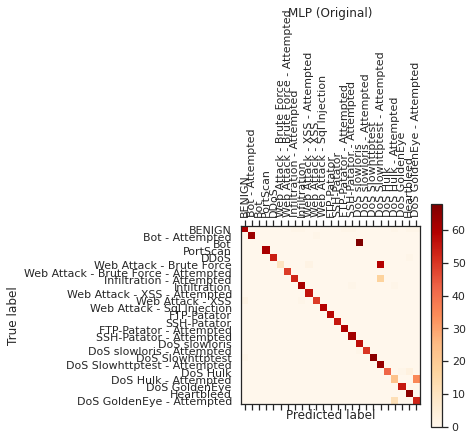

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

[ 7 12 13 ...  9 11  9]
[ 7 12 13 ...  9 11  9]
                                      precision    recall  f1-score   support

                              BENIGN       0.90      0.94      0.92        64
                     Bot - Attempted       0.97      1.00      0.98        63
                                 Bot       0.00      0.00      0.00         0
                            PortScan       1.00      1.00      1.00        61
                                DDoS       0.98      1.00      0.99        54
            Web Attack - Brute Force       0.14      1.00      0.25        10
Web Attack - Brute Force - Attempted       1.00      1.00      1.00        49
            Infiltration - Attempted       0.76      0.98      0.85        54
                        Infiltration       0.97      0.97      0.97        63
        Web Attack - XSS - Attempted       1.00      0.97      0.98        58
                    Web Attack - XSS       0.94      0.98      0.96        50
          Web A

<Figure size 6000x6000 with 0 Axes>

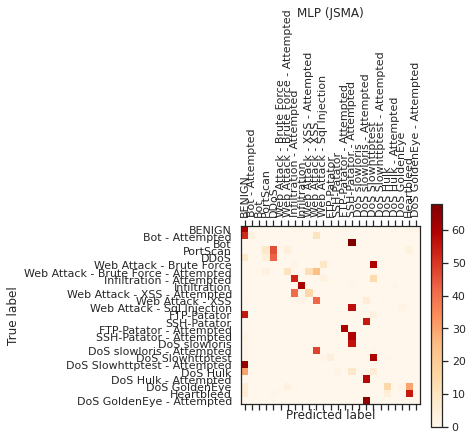

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

[ 7  0 17 ...  7 15  9]
[ 7 12 13 ...  9 11  9]
                                      precision    recall  f1-score   support

                              BENIGN       0.90      0.21      0.34       286
                     Bot - Attempted       0.05      1.00      0.09         3
                                 Bot       0.00      0.00      0.00         0
                            PortScan       0.13      0.53      0.21        15
                                DDoS       0.78      0.48      0.59        90
            Web Attack - Brute Force       0.00      0.00      0.00         0
Web Attack - Brute Force - Attempted       0.20      0.59      0.30        17
            Infiltration - Attempted       0.76      0.54      0.63        98
                        Infiltration       0.97      0.95      0.96        64
        Web Attack - XSS - Attempted       0.27      0.56      0.36        27
                    Web Attack - XSS       0.81      0.34      0.48       124
          Web A

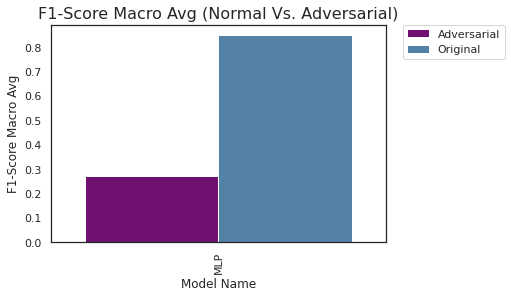

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
# model = MLPClassifier(hidden_layer_sizes=(128,64),activation ='relu',solver='sgd',random_state=1)


original_f1_macros = []
jsma_f1_macros = []

#prepare algorithms to test
models = []
# models.append(('Keras Model',keras_clf))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(128,64,15),activation ='relu',solver='adam', max_iter=300, shuffle=False,random_state=1, verbose=False))) # Converges around 1600 iters / Achieves similar accuracy to keras at 300 iters
# models.append(('NB', MultinomialNB())) # Naive Bayes
# models.append(('KNN', KNeighborsClassifier(n_neighbors = 10))) # k Nearest Neighbour
# models.append(('LR', LogisticRegression())) # Logistic Regression
# models.append(('SVC', SVC(C=10, gamma=0.001, probability=True))) # Support Vector Classifier model is tuned using GridSearch (code in seperate file)
# models.append(('DT', tree.DecisionTreeClassifier())) # Decision Tree
# models.append(('RF', RandomForestClassifier(bootstrap=True, n_jobs=2, verbose=True, max_features=20, n_estimators=170, max_depth=None,min_samples_split=5, random_state=7))) # Random Forest
# models.append(('AdaBoost', AdaBoostClassifier()))
# models.append(('XGBoost',XGBClassifier()))
# models.append(('QDA', QuadraticDiscriminantAnalysis())) # Quadratic Discrimination Analysis
# models.append(('HBBC',HistGradientBoostingClassifier())) # Histogram Based Boosting Classifier
# models.append(('LGBM',LGBMClassifier())) # Light Gradient Boosting Machine
    



#evaluate each algorithm
results = []
names = []
for name, current_model in models:
  names.append(name)
  current_model.fit(x_train, y_train)
  orig_predictions = current_model.predict(x_test)
  print(orig_predictions)
  loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
  print(loss, accuracy)
  if(name=='Kerasy Model'):
    predictions = current_model.predict(x_test)
    print(predictions)
    # rounded_predictions = predictions.round().astype(int)
    # print(rounded_predictions)
    # integer_predictions = []

    # print("-------")
    # for i in range(len(rounded_predictions)):

    #   arr = [rounded_predictions[i][0], rounded_predictions[i][1], rounded_predictions[i][2], 
    #         rounded_predictions[i][3], rounded_predictions[i][4], rounded_predictions[i][5], 
    #         rounded_predictions[i][6], rounded_predictions[i][7], rounded_predictions[i][8],
    #         rounded_predictions[i][9], rounded_predictions[i][10], rounded_predictions[i][11],
    #         rounded_predictions[i][12], rounded_predictions[i][13], rounded_predictions[i][14],
    #         ]

    #   # print(arr)
    #   HighestProbabilityClass = arr.index(max(arr))
    #   # print(HighestProbabilityClass)
    #   integer_predictions.append(HighestProbabilityClass)

    print(predictions)
    cm = confusion_matrix(y_test,predictions)
    plot_cm(cm,str(name) + ' (Original)',str(name) + '-Original.png')

    jsma_predictions = current_model.predict(x_test_jsma)
    print(jsma_predictions)
    print(jsma_predictions)
    cm = confusion_matrix(y_test,jsma_predictions)
    plot_cm(cm,str(name) + ' (JSMA)',str(name) + '-JSMA.png')

  else:
    cm = confusion_matrix(y_test,orig_predictions)
    plot_cm(cm,str(name) + ' (Original)',str(name) + '-Original.png')
    DICT = classification_report(
        orig_predictions,y_test,
        # target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )
    original_f1_macros.append(DICT['macro avg']['f1-score'])
    print_classification_report(orig_predictions, y_test, 'class_report_' + str(name) +'-Original.tex', str(name) + 'Classification Report (Original)')

    jsma_predictions = current_model.predict(x_test_jsma)
    cm = confusion_matrix(y_test,jsma_predictions)
    plot_cm(cm,str(name) + ' (JSMA)',str(name) + '-JSMA.png')
    DICT = classification_report(
        jsma_predictions,y_test,
        # target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )
    jsma_f1_macros.append(DICT['macro avg']['f1-score'])
    print_classification_report(jsma_predictions, y_test, 'class_report_' + str(name) +'-JSMA.tex', str(name) + 'Classification Report (JSMA)')

# print("Name, original f1_macro, JSMA f1 macro")
# for i in range(0,len(names)):
# print(names[i],original_f1_macros[i],jsma_f1_macros[i])

robustness_df = pd.DataFrame(np.column_stack([names, original_f1_macros, jsma_f1_macros]), 
                               columns=['Model Name', 'Original F1-Score Macro Avg', 'Adversarial F1-Score Macro Avg'])

robustness_df[["Original F1-Score Macro Avg", "Adversarial F1-Score Macro Avg"]] = robustness_df[["Original F1-Score Macro Avg", "Adversarial F1-Score Macro Avg"]].apply(pd.to_numeric)
rounded_decimals = robustness_df.round(decimals=2)
print(rounded_decimals)
print(rounded_decimals.sort_values('Adversarial F1-Score Macro Avg'))
sorted_df = rounded_decimals.sort_values('Adversarial F1-Score Macro Avg')

print(sorted_df.to_latex(caption='Model Types sorted by Adversarial F1-Score Macro Avg'))
with open('modeltype_f1_score_amacro_avg.tex', 'w') as f:
  f.write(sorted_df.to_latex(caption='Model Types sorted by Adversarial F1-Score Macro Avg'))

conditions = []
for i in range (0,len(names)):
  conditions.append('Original')
for i in range (0,len(names)):
  conditions.append('Adversarial')


orig_df = pd.DataFrame(np.column_stack([names, original_f1_macros]), 
                               columns=['Model Name', 'F1-Score'])
adversarial_df = pd.DataFrame(np.column_stack([names, jsma_f1_macros]), 
                               columns=['Model Name', 'F1-Score'])

group_frames = [orig_df,adversarial_df]
group_df = pd.concat(group_frames)
group_df['Conditions'] = conditions
group_df[['F1-Score']] = group_df[['F1-Score']].apply(pd.to_numeric)
print(group_df)
group_df = group_df.round(decimals=2)
group_df = group_df.sort_values('F1-Score')

import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Model Name', y='F1-Score', hue='Conditions', hue_order={'Original','Adversarial'}, data=group_df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('F1-Score Macro Avg (Normal Vs. Adversarial)', fontsize=16)

#add axis titles
plt.xlabel('Model Name')
plt.ylabel('F1-Score Macro Avg')

#rotate x-axis labels
plt.xticks(rotation=90)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save the plot
basedir='mount/My Drive/Colab Notebooks/Figures/'
savename='F1-Score-Plot.png'
filename=basedir+savename
plt.savefig(filename,dpi=300,bbox_inches='tight')


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[ 7 12 13 ...  9 11  9]
0.24293604787190756 0.9026667
[[60  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  0  0  0  0  0  1  0  1
   1]
 [ 1 63  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0
   0]
 [ 0  0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  0  0 10  0  0  0  2  0  0  0  0  0  0  0  0  0 59  0  0  0  0
   0]
 [ 0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 53  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 2  0  0  0  0  0  0  0  1  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 59  0  0  0  0  0  0  0  0  0  

<Figure size 6000x6000 with 0 Axes>

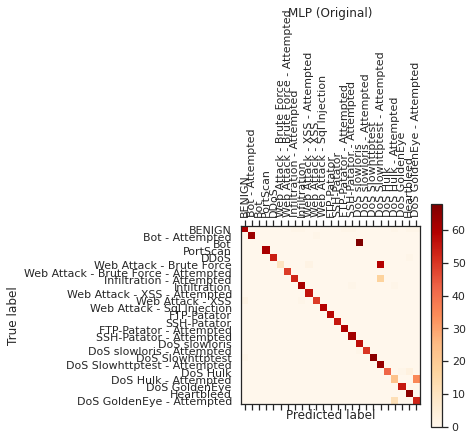

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

[ 7 12 13 ...  9 11  9]
[ 7 12 13 ...  9 11  9]
                                      precision    recall  f1-score   support

                              BENIGN       0.90      0.94      0.92        64
                     Bot - Attempted       0.97      1.00      0.98        63
                                 Bot       0.00      0.00      0.00         0
                            PortScan       1.00      1.00      1.00        61
                                DDoS       0.98      1.00      0.99        54
            Web Attack - Brute Force       0.14      1.00      0.25        10
Web Attack - Brute Force - Attempted       1.00      1.00      1.00        49
            Infiltration - Attempted       0.76      0.98      0.85        54
                        Infiltration       0.97      0.97      0.97        63
        Web Attack - XSS - Attempted       1.00      0.97      0.98        58
                    Web Attack - XSS       0.94      0.98      0.96        50
          Web A

<Figure size 6000x6000 with 0 Axes>

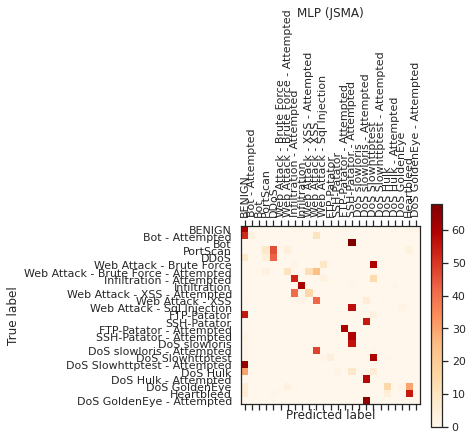

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

[ 7  0 17 ...  7 15  9]
[ 7 12 13 ...  9 11  9]
                                      precision    recall  f1-score   support

                              BENIGN       0.90      0.21      0.34       286
                     Bot - Attempted       0.05      1.00      0.09         3
                                 Bot       0.00      0.00      0.00         0
                            PortScan       0.13      0.53      0.21        15
                                DDoS       0.78      0.48      0.59        90
            Web Attack - Brute Force       0.00      0.00      0.00         0
Web Attack - Brute Force - Attempted       0.20      0.59      0.30        17
            Infiltration - Attempted       0.76      0.54      0.63        98
                        Infiltration       0.97      0.95      0.96        64
        Web Attack - XSS - Attempted       0.27      0.56      0.36        27
                    Web Attack - XSS       0.81      0.34      0.48       124
          Web A

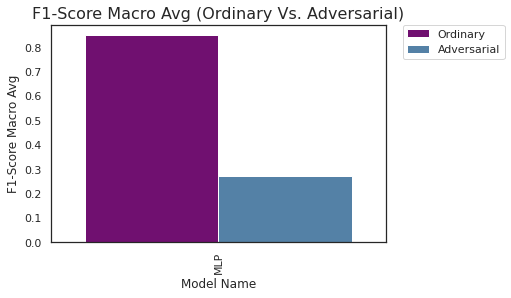

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier


from sklearn.ensemble import VotingClassifier

original_f1_macros = []
jsma_f1_macros = []

# eclfdropout = VotingClassifier(
#     estimators = [
#                   ('Keras Model', keras_clf), 
#                   ('Keras+Dropout', keras_dropout_clf)
#     ],voting='soft'
# )

# eclfdeeper = VotingClassifier(
#     estimators = [
#                   ('Keras Model', keras_clf), 
#                   ('Deeper Model', keras_deeper_clf)
#     ],voting='soft'
# )

# eclfdeeper = VotingClassifier(
#     estimators = [
#                   ('Keras Model', keras_clf), 
#                   ('Deeper Model', keras_deeper_dropout_clf)
#     ],voting='soft'
# )


#prepare algorithms to test
models = []
# models.append(('Keras Model',keras_clf))
# models.append(('Keras+Dropout', keras_dropout_clf))
# models.append(('Keras+DeeperDropout', keras_deeper_dropout_clf))
# models.append(('ECLF+Dropout', eclfdropout))
# models.append(('ECLF+Deeper', eclfdeeper))
# models.append(('OvR', ovr))
# models.append(('OvR+Dropout', ovrdropout))
# models.append(('ECLF+Deeper', LogisticRegression()))
# models.append(('ECLF+Deeper+Dropout', SVC(C=10, gamma=0.001))) #model is tuned using
# #GridSearch (code in seperate file)
# models.append(('DT', tree.DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier(bootstrap=True, n_jobs=2, verbose=True, max_features=20, n_estimators=170, max_depth=None,min_samples_split=5, random_state=7)))
# models.append(('AdaBoost', AdaBoostClassifier()))
# models.append(('XGBoost',XGBClassifier()))
# models.append(('QDA', QuadraticDiscriminantAnalysis()))
# models.append(('HBBC',HistGradientBoostingClassifier()))
# models.append(('LGBM',LGBMClassifier()))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(128,64,15),activation ='relu',solver='adam', max_iter=300, shuffle=False,random_state=1, verbose=False))) # Converges around 1600 iters / Achieves similar accuracy to keras at 300 iters


#evaluate each algorithm
results = []
names = []
for name, current_model in models:
  names.append(name)
  current_model.fit(x_train, y_train)
  orig_predictions = current_model.predict(x_test)
  print(orig_predictions)
  loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
  print(loss, accuracy)
  if(name=='Kerasy Model'):
    predictions = current_model.predict(x_test)
    print(predictions)
    # rounded_predictions = predictions.round().astype(int)
    # print(rounded_predictions)
    # integer_predictions = []

    # print("-------")
    # for i in range(len(rounded_predictions)):

    #   arr = [rounded_predictions[i][0], rounded_predictions[i][1], rounded_predictions[i][2], 
    #         rounded_predictions[i][3], rounded_predictions[i][4], rounded_predictions[i][5], 
    #         rounded_predictions[i][6], rounded_predictions[i][7], rounded_predictions[i][8],
    #         rounded_predictions[i][9], rounded_predictions[i][10], rounded_predictions[i][11],
    #         rounded_predictions[i][12], rounded_predictions[i][13], rounded_predictions[i][14],
    #         ]

    #   # print(arr)
    #   HighestProbabilityClass = arr.index(max(arr))
    #   # print(HighestProbabilityClass)
    #   integer_predictions.append(HighestProbabilityClass)

    print(predictions)
    cm = confusion_matrix(y_test,predictions)
    plot_cm(cm,str(name) + ' (Original)',str(name) + '-Original.png')

    jsma_predictions = current_model.predict(x_test_jsma)
    print(jsma_predictions)
    print(jsma_predictions)
    cm = confusion_matrix(y_test,jsma_predictions)
    plot_cm(cm,str(name) + ' (JSMA)',str(name) + '-JSMA.png')

  else:
    cm = confusion_matrix(y_test,orig_predictions)
    plot_cm(cm,str(name) + ' (Original)',str(name) + '-Original.png')
    DICT = classification_report(
        orig_predictions,y_test,
        # target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )
    original_f1_macros.append(DICT['macro avg']['f1-score'])
    print_classification_report(orig_predictions, y_test, 'class_report_' + str(name) +'-Original.tex', str(name) + 'Classification Report (Original)')

    jsma_predictions = current_model.predict(x_test_jsma)
    cm = confusion_matrix(y_test,jsma_predictions)
    plot_cm(cm,str(name) + ' (JSMA)',str(name) + '-JSMA.png')
    DICT = classification_report(
        jsma_predictions,y_test,
        # target_names=l_col_list,
        labels=range(0,(len(outcome))),output_dict=True
    )
    jsma_f1_macros.append(DICT['macro avg']['f1-score'])
    print_classification_report(jsma_predictions, y_test, 'class_report_' + str(name) +'-JSMA.tex', str(name) + 'Classification Report (JSMA)')

# print("Name, original f1_macro, JSMA f1 macro")
# for i in range(0,len(names)):
# print(names[i],original_f1_macros[i],jsma_f1_macros[i])

robustness_df = pd.DataFrame(np.column_stack([names, original_f1_macros, jsma_f1_macros]), 
                               columns=['Model Name', 'Original F1-Score Macro Avg', 'Adversarial F1-Score Macro Avg'])

robustness_df[["Original F1-Score Macro Avg", "Adversarial F1-Score Macro Avg"]] = robustness_df[["Original F1-Score Macro Avg", "Adversarial F1-Score Macro Avg"]].apply(pd.to_numeric)
rounded_decimals = robustness_df.round(decimals=2)
print(rounded_decimals)
print(rounded_decimals.sort_values('Adversarial F1-Score Macro Avg'))
sorted_df = rounded_decimals.sort_values('Adversarial F1-Score Macro Avg')

print(sorted_df.to_latex(caption='Model Types sorted by Adversarial F1-Score Macro Avg'))
with open('modeltype_f1_score_amacro_avg.tex', 'w') as f:
  f.write(sorted_df.to_latex(caption='Model Types sorted by Adversarial F1-Score Macro Avg'))

conditions = []
for i in range (0,len(names)):
  conditions.append('Ordinary')
for i in range (0,len(names)):
  conditions.append('Adversarial')


orig_df = pd.DataFrame(np.column_stack([names, original_f1_macros]), 
                               columns=['Model Name', 'F1-Score'])
adversarial_df = pd.DataFrame(np.column_stack([names, jsma_f1_macros]), 
                               columns=['Model Name', 'F1-Score'])

group_frames = [orig_df,adversarial_df]
group_df = pd.concat(group_frames)
group_df['Conditions'] = conditions
group_df[['F1-Score']] = group_df[['F1-Score']].apply(pd.to_numeric)
print(group_df)
group_df = group_df.round(decimals=2)
group_df = group_df.sort_values('F1-Score')

import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Model Name', y='F1-Score', hue='Conditions', hue_order={'Ordinary','Adversarial'}, data=group_df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('F1-Score Macro Avg (Ordinary Vs. Adversarial)', fontsize=16)

#add axis titles
plt.xlabel('Model Name')
plt.ylabel('F1-Score Macro Avg')

#rotate x-axis labels
plt.xticks(rotation=90)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save the plot
basedir='mount/My Drive/Colab Notebooks/Figures/'
savename='Basic-Hardening-Plot.png'
filename=basedir+savename
plt.savefig(filename,dpi=300,bbox_inches='tight')



In [58]:
# # Define Expert Hierarchy 
# hier_labels = []
# for i in range (0,len(Y_class)):
#   # print(str(Y_class[i]))
#   # print(outcome)
#   if(int(Y_class[i]) == 0): # outcome[0]):
#     hier_labels.append(['Other', 'BENIGN'])

#   elif(int(Y_class[i]) == 1):
#     hier_labels.append(['DoS','DDoS'])

#   elif(int(Y_class[i]) == 2):
#       hier_labels.append(['Penetration','PortScan'])

#   elif(int(Y_class[i]) == 3):
#       hier_labels.append(['Penetration','Bot'])
  
#   elif(int(Y_class[i]) == 4):
#       hier_labels.append(['Penetration','Infiltration'])
  
#   elif(int(Y_class[i]) == 5):
#       hier_labels.append(['BruteForce','WebAttack Brute Force'])
  
#   elif(int(Y_class[i]) == 6):
#       hier_labels.append(['Exploit','XXS'])
#   elif(int(Y_class[i]) == 7):
#       hier_labels.append(['Exploit','SQL Injection'])
#   elif(int(Y_class[i]) == 8):
#       hier_labels.append(['BruteForce','FTP-Patator'])
#   elif(int(Y_class[i]) == 9):
#       hier_labels.append(['BruteForce','SSH-Patator'])
#   elif(int(Y_class[i]) == 10):
#       hier_labels.append(['DoS','DoS slowloris'])
#   elif(int(Y_class[i]) == 11):
#       hier_labels.append(['DoS','DoS Slowhttptest'])
#   elif(int(Y_class[i]) == 12):
#       hier_labels.append(['DoS','DoS Hulk'])
#   elif(int(Y_class[i]) == 13):
#       hier_labels.append(['DoS','Dos GoldenEye'])
#   elif(int(Y_class[i]) == 14):
#       hier_labels.append(['Exploit','Heartbleed'])
# print(len(Y_class))
# print(len(hier_labels))
# print(len(Y_class)-(len(hier_labels)))
  

In [59]:
# Define Dataset Hierarchy
print(Y_class.shape)
print(np.unique(Y_class))
print(Y_attack.unique())
hier_labels = []

for i in range (0,len(Y_class)):
  # print(str(Y_class[i]))
  # print(outcome)
  if(int(Y_class[i]) == 0): # outcome[0]):
    hier_labels.append(['Other', 'BENIGN'])

  elif(int(Y_class[i]) == 1):
    hier_labels.append(['Friday','Bot - Attempted'])

  elif(int(Y_class[i]) == 2):
      hier_labels.append(['Friday','Bot'])

  elif(int(Y_class[i]) == 3):
      hier_labels.append(['Friday','PortScan'])
  
  elif(int(Y_class[i]) == 4):
      hier_labels.append(['Friday','DDoS'])

  elif(int(Y_class[i]) == 5):
      hier_labels.append(['Thursday','Web Attack - Brute Force'])
  
  elif(int(Y_class[i]) == 6):
      hier_labels.append(['Thursday','Web Attack - Brute Force - Attempted'])
  
  elif(int(Y_class[i]) == 7):
      hier_labels.append(['Thursday','Infiltration - Attempted'])
  elif(int(Y_class[i]) == 8):
      hier_labels.append(['Thursday','Infiltration'])
  elif(int(Y_class[i]) == 9):
      hier_labels.append(['Thursday','Web Attack - XSS - Attempted'])
  elif(int(Y_class[i]) == 10):
      hier_labels.append(['Thursday','Web Attack - XSS' ])
  elif(int(Y_class[i]) == 11):
      hier_labels.append(['Thursday','Web Attack - Sql Injection'])
  elif(int(Y_class[i]) == 12):
      hier_labels.append(['Tuesday','FTP-Patator'])
  elif(int(Y_class[i]) == 13):
      hier_labels.append(['Tuesday','SSH-Patator' ])
  elif(int(Y_class[i]) == 14):
      hier_labels.append(['Tuesday','FTP-Patator - Attempted'])
  elif(int(Y_class[i]) == 15):
      hier_labels.append(['Tuesday','SSH-Patator - Attempted'])
  elif(int(Y_class[i]) == 16):
      hier_labels.append(['Wednesday','DoS slowloris'])
  elif(int(Y_class[i]) == 17):
      hier_labels.append(['Wednesday','DoS slowloris - Attempted'])
  elif(int(Y_class[i]) == 18):
      hier_labels.append(['Wednesday','DoS Slowhttptest'])
  elif(int(Y_class[i]) == 19):
      hier_labels.append(['Wednesday','DoS Slowhttptest - Attempted' ])
  elif(int(Y_class[i]) == 20):
      hier_labels.append(['Wednesday','DoS Hulk'])
  elif(int(Y_class[i]) == 21):
      hier_labels.append(['Wednesday','DoS Hulk - Attempted'])
  elif(int(Y_class[i]) == 22):
      hier_labels.append(['Wednesday','DoS GoldenEye'])
  elif(int(Y_class[i]) == 23):
      hier_labels.append(['Wednesday','Heartbleed'])
  elif(int(Y_class[i]) == 24):
      hier_labels.append(['Wednesday','DoS GoldenEye - Attempted'])
  
print(len(Y_class))
print(len(hier_labels))
print(len(Y_class)-(len(hier_labels)))

(5000,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
['BENIGN' 'Bot - Attempted' 'Bot' 'PortScan' 'DDoS'
 'Web Attack - Brute Force' 'Web Attack - Brute Force - Attempted'
 'Infiltration - Attempted' 'Infiltration' 'Web Attack - XSS - Attempted'
 'Web Attack - XSS' 'Web Attack - Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'FTP-Patator - Attempted' 'SSH-Patator - Attempted'
 'DoS slowloris' 'DoS slowloris - Attempted' 'DoS Slowhttptest'
 'DoS Slowhttptest - Attempted' 'DoS Hulk' 'DoS Hulk - Attempted'
 'DoS GoldenEye' 'Heartbleed' 'DoS GoldenEye - Attempted']
5000
5000
0


In [60]:
# # Define Average Hierarchy 
# hier_labels = []
# for i in range (0,len(Y_class)):
#   # print(str(Y_class[i]))
#   # print(outcome)
#   if(int(Y_class[i]) == 0): # outcome[0]):
#     hier_labels.append(['2', 'BENIGN'])

#   elif(int(Y_class[i]) == 1):
#     hier_labels.append(['2','DDoS'])

#   elif(int(Y_class[i]) == 2):
#       hier_labels.append(['2','PortScan'])

#   elif(int(Y_class[i]) == 3):
#       hier_labels.append(['2','Bot'])
  
#   elif(int(Y_class[i]) == 4):
#       hier_labels.append(['0','Infiltration'])
  
#   elif(int(Y_class[i]) == 5):
#       hier_labels.append(['2','WebAttack Brute Force'])
  
#   elif(int(Y_class[i]) == 6):
#       hier_labels.append(['2','XXS'])
#   elif(int(Y_class[i]) == 7):
#       hier_labels.append(['1','SQL Injection'])
#   elif(int(Y_class[i]) == 8):
#       hier_labels.append(['0','FTP-Patator'])
#   elif(int(Y_class[i]) == 9):
#       hier_labels.append(['3','SSH-Patator'])
#   elif(int(Y_class[i]) == 10):
#       hier_labels.append(['2','DoS slowloris'])
#   elif(int(Y_class[i]) == 11):
#       hier_labels.append(['2','DoS Slowhttptest'])
#   elif(int(Y_class[i]) == 12):
#       hier_labels.append(['2','DoS Hulk'])
#   elif(int(Y_class[i]) == 13):
#       hier_labels.append(['2','Dos GoldenEye'])
#   elif(int(Y_class[i]) == 14):
#       hier_labels.append(['2','Heartbleed'])
# print(len(Y_class))
# print(len(hier_labels))
# print(len(Y_class)-(len(hier_labels)))


In [61]:
# Split training and test subsets
from sklearn.model_selection import train_test_split

#Train test split

testSize = 0.3

print(len(x_scaled))
print(len(hier_labels))
x_train, x_test, y_train, y_test = train_test_split(x_scaled, hier_labels, test_size = testSize, shuffle=True, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

print(y_train)

coarse_label = np.empty(len(x_train),dtype=object)
finer_label = np.empty(len(x_train),dtype=object)

for i in range(0,len(y_train)):

  coarse_label[i] = y_train[i][0]
  finer_label[i] = y_train[i][1]

print(coarse_label[0])
print(finer_label[0])




print(y_test)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(coarse_label)
print(coarse_label[0])
coarse_label= le.transform(coarse_label) # multi-class 
print(coarse_label[0])

le.fit(finer_label)
print(finer_label[0])
finer_label= le.transform(finer_label) # multi-class 
print(finer_label[0])


5000
5000
[['Thursday', 'Web Attack - XSS - Attempted'], ['Thursday', 'Web Attack - XSS'], ['Wednesday', 'DoS GoldenEye'], ['Thursday', 'Web Attack - Brute Force'], ['Tuesday', 'FTP-Patator'], ['Other', 'BENIGN'], ['Thursday', 'Web Attack - XSS'], ['Thursday', 'Infiltration - Attempted'], ['Wednesday', 'DoS GoldenEye - Attempted'], ['Thursday', 'Web Attack - Brute Force - Attempted'], ['Thursday', 'Infiltration'], ['Tuesday', 'SSH-Patator - Attempted'], ['Friday', 'Bot'], ['Wednesday', 'DoS Hulk - Attempted'], ['Thursday', 'Infiltration - Attempted'], ['Thursday', 'Infiltration'], ['Friday', 'DDoS'], ['Thursday', 'Web Attack - Brute Force - Attempted'], ['Thursday', 'Web Attack - XSS'], ['Tuesday', 'FTP-Patator'], ['Tuesday', 'SSH-Patator'], ['Thursday', 'Web Attack - Sql Injection'], ['Friday', 'Bot - Attempted'], ['Wednesday', 'DoS GoldenEye'], ['Thursday', 'Infiltration'], ['Thursday', 'Web Attack - Brute Force'], ['Wednesday', 'DoS Hulk'], ['Friday', 'PortScan'], ['Tuesday', 'FTP-P

In [62]:
# Build pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from hiclass import LocalClassifierPerNode, LocalClassifierPerParentNode, LocalClassifierPerLevel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# base_classifier = LogisticRegression(
#     random_state=0,
#     max_iter=10000,
#     n_jobs=1,
# )

base_classifier = MLPClassifier(hidden_layer_sizes=(128,64,15),activation ='relu',solver='adam', max_iter=300, shuffle=False,random_state=1, verbose=False) # Converges around 1600 iters / Achieves similar accuracy to keras at 300 iters

LCPPN = 0
LCPN  = 0 
LCPL  = 0

lcpn = LocalClassifierPerParentNode(
    local_classifier=base_classifier,
    verbose=20,
    n_jobs=1,
)
LCPPN = 1

# lcpn = LocalClassifierPerNode(
#     local_classifier=base_classifier,
#     verbose=20,
#     n_jobs=1,
# )
# LCPN = 1

# lcpn = LocalClassifierPerLevel(
#     local_classifier=base_classifier,
#     verbose=20,
#     n_jobs=1,
# )
# LCPL =1 


pipeline = Pipeline([
    # ('count', CountVectorizer()),
    # ('tfidf', TfidfTransformer()),
    ('model', lcpn),
])



# Train classifier
pipeline.fit(x_train, y_train)

2022-11-13 14:01:04,884 - LCPPN - INFO - Creating digraph from 3500 2D labels
INFO:LCPPN:Creating digraph from 3500 2D labels
2022-11-13 14:01:04,900 - LCPPN - INFO - Detected 5 roots
INFO:LCPPN:Detected 5 roots
2022-11-13 14:01:04,902 - LCPPN - INFO - Initializing local classifiers
INFO:LCPPN:Initializing local classifiers
2022-11-13 14:01:04,907 - LCPPN - INFO - Fitting local classifiers
INFO:LCPPN:Fitting local classifiers
2022-11-13 14:01:04,910 - LCPPN - INFO - Fitting local classifier for node 'Thursday' (1/6)
INFO:LCPPN:Fitting local classifier for node 'Thursday' (1/6)
2022-11-13 14:01:09,426 - LCPPN - INFO - Fitting local classifier for node 'Wednesday' (2/6)
INFO:LCPPN:Fitting local classifier for node 'Wednesday' (2/6)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
2022-11-13

Pipeline(steps=[('model',
                 LocalClassifierPerParentNode(local_classifier=MLPClassifier(hidden_layer_sizes=(128,
                                                                                                 64,
                                                                                                 15),
                                                                             max_iter=300,
                                                                             random_state=1,
                                                                             shuffle=False),
                                              verbose=20))])

In [63]:
# Predict
predictions = lcpn.predict(x_test)

2022-11-13 14:01:31,534 - LCPPN - INFO - Predicting
INFO:LCPPN:Predicting


In [64]:
def retunique(list1):
    x = np.array(list1)
    list = (np.unique(x).tolist)
    return list

['Thursday', 'Tuesday', 'Tuesday', 'Thursday', 'Friday', 'Other', 'Friday', 'Tuesday', 'Tuesday', 'Thursday', 'Tuesday', 'Friday', 'Friday', 'Friday', 'Tuesday', 'Wednesday', 'Thursday', 'Wednesday', 'Thursday', 'Thursday', 'Friday', 'Tuesday', 'Thursday', 'Friday', 'Wednesday', 'Friday', 'Wednesday', 'Friday', 'Wednesday', 'Friday', 'Thursday', 'Friday', 'Wednesday', 'Wednesday', 'Thursday', 'Tuesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Thursday', 'Wednesday', 'Wednesday', 'Other', 'Other', 'Friday', 'Wednesday', 'Wednesday', 'Wednesday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Tuesday', 'Tuesday', 'Thursday', 'Tuesday', 'Thursday', 'Other', 'Thursday', 'Tuesday', 'Thursday', 'Wednesday', 'Wednesday', 'Wednesday', 'Other', 'Tuesday', 'Wednesday', 'Thursday', 'Wednesday', 'Wednesday', 'Thursday', 'Other', 'Friday', 'Friday', 'Thursday', 'Thursday', 'Friday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Tuesday', 'Wednesday', 'Thursday', 'Tuesday', 'Thursday', 'Friday'

<Figure size 6000x6000 with 0 Axes>

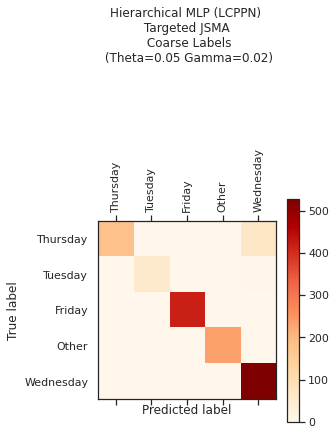

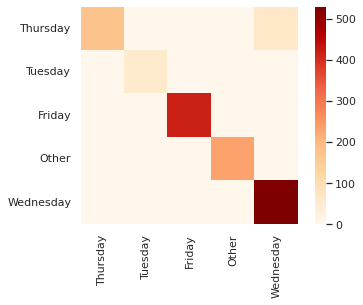

[[59  0  0  0  0  1  1  1  0  0  0  0  0  0  1  0  1  0  0  2  0  0  0  1
   0]
 [ 0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 54  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 54  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  0 43  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 35  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  0  0  0 66  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 57  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  1 50  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 58

<Figure size 6000x6000 with 0 Axes>

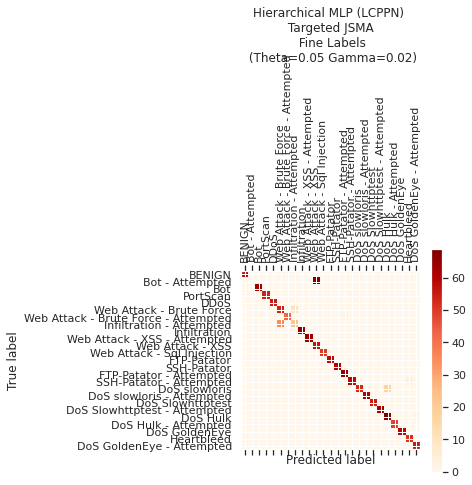

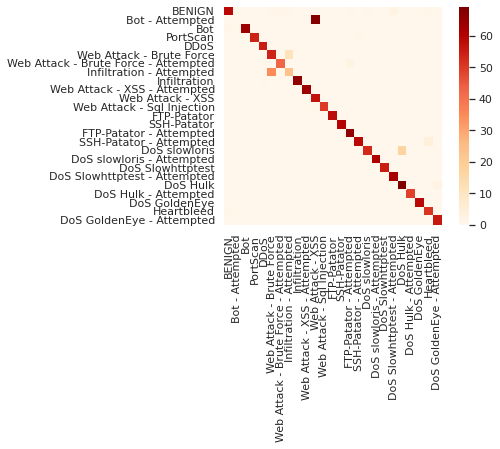

Level	f1_macro		f1_micro		f1_weighted		f1_hierarchical

1	0.9371237804023455	0.9473333333333334	0.9448960794175157	0.9726817279516022

2	0.88886202345694	0.898	0.8823811964830737	0.9545428257474986

Ordinary Hier Layer 1: 0.9726817279516022
Ordinary Hier Layer 2: 0.9545428257474986


In [65]:


# print(y_test)
# print(predictions)
coarse_ground_truth = []
coarse_predictions = []

fine_ground_truth = []
fine_predictions = []

for i in range(0,len(y_test)):
  coarse_ground_truth.append(y_test[i][0])
  coarse_predictions.append(predictions[i][0])
  fine_ground_truth.append(y_test[i][1])
  fine_predictions.append(predictions[i][1])
print(coarse_ground_truth)
cm = confusion_matrix(coarse_ground_truth,coarse_predictions)
print(type(coarse_ground_truth))
labels = list(dict.fromkeys(coarse_ground_truth))


print(type(labels))
print(cm)
if(LCPPN):
  #plot_cm_thetahier(cm,'Hierarchical MLP (LCPPN) \n Targeted JSMA \n Coarse Labels\n', coarse_ground_truth, 'ConfusionMatrix-Hier-LCPPN-MLPCoarse-TARGETED-JSMA.png')
  plot_cm_thetahier(cm,'Hierarchical MLP (LCPPN) \n Targeted JSMA \n Coarse Labels\n', labels, 'ConfusionMatrix-Hier-LCPPN-MLPCoarse-TARGETED-JSMA.png')
  cm = confusion_matrix(fine_ground_truth,fine_predictions)
  print(cm)
  plot_cm_theta(cm,'Hierarchical MLP (LCPPN) \n Targeted JSMA \n Fine Labels\n','ConfusionMatrix-Hier-LCPPN-MLPFine-TARGETED-JSMA.png')
elif(LCPN):
  plot_cm_thetahier(cm,'Hierarchical MLP (LCPN) \n Targeted JSMA \n Coarse Labels\n', coarse_ground_truth, 'ConfusionMatrix-Hier-LCPN-MLPCoarse-TARGETED-JSMA.png')

  cm = confusion_matrix(fine_ground_truth,fine_predictions)
  print(cm)
  plot_cm_theta(cm,'Hierarchical MLP (LCPN) \n Targeted JSMA \n Fine Labels\n','ConfusionMatrix-Hier-LCPN-MLPFine-TARGETED-JSMA.png')
elif(LCPL): 
  plot_cm_thetahier(cm,'Hierarchical MLP (LCPL) \n Targeted JSMA \n Coarse Labels\n', coarse_ground_truth, 'ConfusionMatrix-Hier-LCPL-MLPCoarse-TARGETED-JSMA.png')

  cm = confusion_matrix(fine_ground_truth,fine_predictions)
  print(cm)
  plot_cm_theta(cm,'Hierarchical MLP (LCPL) \n Targeted JSMA \n Fine Labels\n','ConfusionMatrix-Hier-LCPL-MLPFine-TARGETED-JSMA.png')
# Compute metrics

from sklearn.metrics import f1_score
from hiclass.metrics import f1

# print(y_test.shape)

# print(y_test[0])
# print(y_test[1])

y_test_df = pd.DataFrame(y_test)
# print(y_test)
predictions_df = pd.DataFrame(predictions)


# print(y_test)
# print(predictions[0][0])
# # 
# # print(y_test[:, col])
# print(predictions[:, col])
# predictions = predictions.reshape(113,2)
# print(predictions)

# print(predictions_df[0])
# print(y_test_df[0])
# print(predictions_df[1])




print("Level\tf1_macro\t\tf1_micro\t\tf1_weighted\t\tf1_hierarchical\n")
for col in range(2):
    f1_macro = f1_score(y_test_df[col], predictions_df[col], average="macro")
    f1_micro = f1_score(y_test_df[col], predictions_df[col], average="micro")
    f1_weighted = f1_score(y_test_df[col], predictions_df[col], average="weighted")
    f1_hierarchical = f1(y_test_df[col], predictions_df[col])
    print(f"{col + 1}\t{f1_macro}\t{f1_micro}\t{f1_weighted}\t{f1_hierarchical}\n")

HierMLPNormalTrafficF1 = f1(y_test_df[0], predictions_df[0])

HierMLPNormalTrafficF1Layer1 = f1(y_test_df[0], predictions_df[0])
HierMLPNormalTrafficF1Layer2 = f1(y_test_df[1], predictions_df[1])

# print(HierMLPNormalTrafficF1)

print(f"Ordinary Hier Layer 1: {HierMLPNormalTrafficF1Layer1}")
print(f"Ordinary Hier Layer 2: {HierMLPNormalTrafficF1Layer2}")

In [66]:



# Train classifier
pipeline.fit(x_train, y_train)

# Load in the x_test_jsma numpy 
savename='x_test_jsma.npy'
basedir='mount/My Drive/Colab Notebooks/Figures/'
filename=basedir+savename
print("Reading file")
# x_test_jsma = np.load(filename)

# Predict
predictions = lcpn.predict(x_test_jsma)

2022-11-13 14:01:37,912 - LCPPN - INFO - Creating digraph from 3500 2D labels
2022-11-13 14:01:37,912 - LCPPN - INFO - Creating digraph from 3500 2D labels
INFO:LCPPN:Creating digraph from 3500 2D labels
2022-11-13 14:01:37,925 - LCPPN - INFO - Detected 5 roots
2022-11-13 14:01:37,925 - LCPPN - INFO - Detected 5 roots
INFO:LCPPN:Detected 5 roots
2022-11-13 14:01:37,930 - LCPPN - INFO - Initializing local classifiers
2022-11-13 14:01:37,930 - LCPPN - INFO - Initializing local classifiers
INFO:LCPPN:Initializing local classifiers
2022-11-13 14:01:37,933 - LCPPN - INFO - Fitting local classifiers
2022-11-13 14:01:37,933 - LCPPN - INFO - Fitting local classifiers
INFO:LCPPN:Fitting local classifiers
2022-11-13 14:01:37,936 - LCPPN - INFO - Fitting local classifier for node 'Thursday' (1/6)
2022-11-13 14:01:37,936 - LCPPN - INFO - Fitting local classifier for node 'Thursday' (1/6)
INFO:LCPPN:Fitting local classifier for node 'Thursday' (1/6)
2022-11-13 14:01:40,989 - LCPPN - INFO - Fitting 

Reading file


In [67]:
# Compute metrics for x_test_jsma

from sklearn.metrics import f1_score
from hiclass.metrics import f1

# print(y_test.shape)

# print(y_test[0])
# print(y_test[1])

y_test_df = pd.DataFrame(y_test)
# print(y_test)
predictions_df = pd.DataFrame(predictions)


# print(y_test)
# print(predictions[0][0])
# # 
# # print(y_test[:, col])
# print(predictions[:, col])
# predictions = predictions.reshape(113,2)
# print(predictions)

# print(predictions_df[0])
# print(y_test_df[0])
# print(predictions_df[1])




print("Level\tf1_macro\t\tf1_micro\t\tf1_weighted\t\tf1_hierarchical\n")
for col in range(2):
    f1_macro = f1_score(y_test_df[col], predictions_df[col], average="macro")
    f1_micro = f1_score(y_test_df[col], predictions_df[col], average="micro")
    f1_weighted = f1_score(y_test_df[col], predictions_df[col], average="weighted")
    f1_hierarchical = f1(y_test_df[col], predictions_df[col])
    print(f"{col + 1}\t{f1_macro}\t{f1_micro}\t{f1_weighted}\t{f1_hierarchical}\n")

HierMLPAdversarialF1 = f1(y_test_df[0], predictions_df[0])

HierMLPAdversarialF1Layer1 = f1(y_test_df[0], predictions_df[0])
HierMLPAdversarialF1Layer2 = f1(y_test_df[1], predictions_df[1])

print(f"JSMA Hier Layer 1: {HierMLPAdversarialF1Layer1}")
print(f"JSMA Hier Layer 2: {HierMLPAdversarialF1Layer2}")

Level	f1_macro		f1_micro		f1_weighted		f1_hierarchical

1	0.5519656784381004	0.5813333333333334	0.5879378623606593	0.8269422192728824

2	0.4168518652110062	0.47533333333333333	0.4077302616316815	0.7312525101841758

JSMA Hier Layer 1: 0.8269422192728824
JSMA Hier Layer 2: 0.7312525101841758


0.9726817279516022 0.8269422192728824
['Ordinary', 'Adversarial']
['Ordinary', 'Ordinary', 'Adversarial', 'Adversarial']
                 Model Name  F1-Score   Conditions
0                       MLP  0.847795     Ordinary
1  Hierarchical MLP (LCPPN)  0.972682     Ordinary
0                       MLP  0.267409  Adversarial
1  Hierarchical MLP (LCPPN)  0.826942  Adversarial
<<
                 Model Name  F1-Score   Conditions
0                       MLP      0.85     Ordinary
1  Hierarchical MLP (LCPPN)      0.97     Ordinary
0                       MLP      0.27  Adversarial
1  Hierarchical MLP (LCPPN)      0.83  Adversarial
Ordinary Hier Layer 1: 0.9726817279516022
Ordinary Hier Layer 2: 0.9545428257474986

JSMA Hier Layer 1: 0.8269422192728824
JSMA Hier Layer 2: 0.7312525101841758
<<


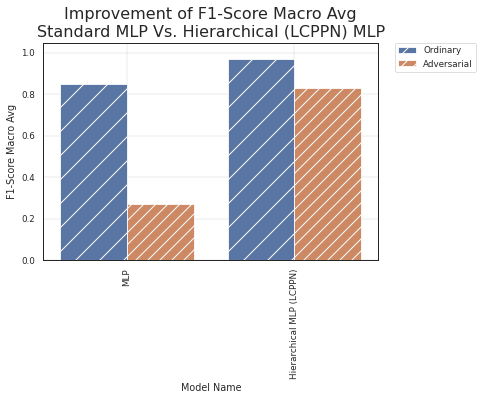

In [68]:
# Plot F1-Scores for Original and Hierarchical models

# models =['MLP', 'Hierarchical MLP']

# names=[]
# conditions = []
# f1scores = []


# f1scores.append()

print(HierMLPNormalTrafficF1,
      HierMLPAdversarialF1)


# print(orig_df)
# print(adversarial_df)
print(conditions)
conditions = []
conditions.append('Ordinary')
conditions.append('Ordinary')
conditions.append('Adversarial')
conditions.append('Adversarial')

print(conditions)
if(LCPPN):
  new_row = {'F1-Score' : HierMLPNormalTrafficF1, 'Model Name': 'Hierarchical MLP (LCPPN)'}
elif(LCPN):
  new_row = {'F1-Score' : HierMLPNormalTrafficF1, 'Model Name': 'Hierarchical MLP (LCPN)'}
elif(LCPL):
  new_row = {'F1-Score' : HierMLPNormalTrafficF1, 'Model Name': 'Hierarchical MLP (LCPL)'}
orig_df = orig_df.append(new_row,ignore_index=True)
# conditions.append('Ordinary')


if(LCPPN):
  new_row = {'F1-Score' : HierMLPAdversarialF1, 'Model Name': 'Hierarchical MLP (LCPPN)'}
elif(LCPN):
  new_row = {'F1-Score' : HierMLPAdversarialF1, 'Model Name': 'Hierarchical MLP (LCPN)'}

elif(LCPL):
  new_row = {'F1-Score' : HierMLPAdversarialF1, 'Model Name': 'Hierarchical MLP (LCPL)'}


adversarial_df = adversarial_df.append(new_row,ignore_index=True)
# conditions.append('Adversarial')


group_frames = [orig_df,adversarial_df]
group_df = pd.concat(group_frames)
group_df['Conditions'] = conditions
group_df[['F1-Score']] = group_df[['F1-Score']].apply(pd.to_numeric)
print(group_df)
group_df = group_df.round(decimals=2)
# group_df = group_df.sort_values('Model Name')

print('<<')
print(group_df)


print(f"Ordinary Hier Layer 1: {HierMLPNormalTrafficF1Layer1}")
print(f"Ordinary Hier Layer 2: {HierMLPNormalTrafficF1Layer2}")
print("")
print(f"JSMA Hier Layer 1: {HierMLPAdversarialF1Layer1}")
print(f"JSMA Hier Layer 2: {HierMLPAdversarialF1Layer2}")

print("<<")
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set_context("paper")
sns.color_palette("dark:salmon_r", as_cmap=True)

#create grouped bar chart hue_order={'Ordinary','Adversarial'}
bar = sns.barplot(x='Model Name', y='F1-Score', hue='Conditions',  data=group_df)
            # palette=['purple', 'steelblue'])
            # palette=['orange', 'red'])



bar.grid(b=True, which='major', color='black', linewidth=0.075)
bar.grid(b=True, which='minor', color='black', linewidth=0.075)
# Define some hatches
hatches = ['/', '/', '//', '//'] # , 'x', '\\', '*', 'o']

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

#add overall title
if(LCPPN):
  plt.title('Improvement of F1-Score Macro Avg\nStandard MLP Vs. Hierarchical (LCPPN) MLP', fontsize=16)
elif(LCPN):
  plt.title('Improvement of F1-Score Macro Avg\nStandrad MLP Vs. Hierarchical (LCPN) MLP ', fontsize=16)
elif(LCPL):
  plt.title('Improvement of F1-Score Macro Avg\nStandard MLP Vs. Hierarchical (LCPL) MLP ', fontsize=16)


#add axis titles
plt.xlabel('Model Name')
plt.ylabel('F1-Score Macro Avg')
plt.ylim(0.0,1.05)


#rotate x-axis labels
plt.xticks(rotation=90)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save the plot
basedir='mount/My Drive/Colab Notebooks/Figures/'
if(LCPPN):
  savename='ComparisonMLPHier-LCPPN.png'
elif(LCPN):
  savename='ComparisonMLPHier-LCPN.png'
elif(LCPL):
  savename='ComparisonMLPHier-LCPL.png'
filename=basedir+savename
plt.savefig(filename,dpi=300,bbox_inches='tight')
group_df.to_csv(filename+'.csv')


In [69]:
#plot_cl binary_classifier = tf.keras.Sequential([
#         tf.keras.layers.Dense(128, activation='relu', input_shape=[x_train.shape[1]]),
#         tf.keras.layers.Dense(1, activation='sigmoid'),
# ])

# binary_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# keras_binary_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:binary_classifier)
# keras_binary_clf._estimator_type = "classifier"

# binary_ovr = (keras_binary_clf)

# binary_ovr.fit(x_train,y_train)

# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# XGB = XGBClassifier()

# RF = RandomForestClassifier(bootstrap=True, max_features='auto', n_estimators=140, max_depth=None, 
#                             min_samples_split=5, random_state=7)

# RF.fit(x_train, y_train)

# XGB.fit(x_train, y_train)

# solo_rf_predictions = RF.predict(x_test)
# cm = confusion_matrix(y_test,solo_rf_predictions)

# plot_cm(cm,'Multiclass Random Forest (Original)','only_rf.png')

# solo_rf_jsma_predictions = RF.predict(x_test_jsma)

# cm = confusion_matrix(y_test,solo_rf_jsma_predictions)

# plot_cm(cm,'Multiclass Random Forest (JSMA)','only_rf.png')

# solo_xgb_predictions = XGB.predict(x_test)

# cm = confusion_matrix(y_test,solo_xgb_predictions)

# plot_cm(cm,'Multiclass XGB (Original)','only_xgb.png')

# solo_xgb_jsma_predictions = XGB.predict(x_test_jsma)

# cm = confusion_matrix(y_test,solo_xgb_jsma_predictions)

# plot_cm(cm,'Multiclass XGB (JSMA)','only_xgb_jsma.png')


# # Extract single tree
# estimator = RF.estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# basedir='mount/My Drive/Colab Notebooks/Figures/'
# print(basedir)
# export_graphviz(estimator, out_file=basedir+'tree.dot', 
#                 feature_names = subset.columns,
#                 class_names = outcome,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', basedir+'tree.dot', '-o', basedir+'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = basedir+'tree.png')

from sklearn.ensemble import VotingClassifier

print(models)

eclf1 = VotingClassifier(
    estimators = [
                  ('Keras Model', keras_clf), 
                  ('NB', MultinomialNB()), 
                  ('kNN', KNeighborsClassifier(n_neighbors=10)),
                  ('LogR', LogisticRegression()), 
                  ('SVC', SVC(C=10, gamma=0.001)),
                  ('DT', tree.DecisionTreeClassifier()),
                  ('RF', RandomForestClassifier(max_features=20, min_samples_split=5, n_estimators=170, n_jobs=2, random_state=7, verbose=True)),
                  ('AdaB', AdaBoostClassifier()),
                  ('XGBoost', XGBClassifier()),
                  ('QDA', QuadraticDiscriminantAnalysis()),
                  ('Histogram Based Boosting Classifier', HistGradientBoostingClassifier())
                  
                  
                  # ('Multiclass', keras_clf),
                  # ('OneVsRest', ovr)
                  # #('RF', RF)

                  # #('OneVsRest', binary_ovr)

    ],voting='hard'
)

eclf1 = eclf1.fit(x_train, y_train)

eclf2 = VotingClassifier(
    estimators = [
                  ('Keras Model', keras_clf), 
                  ('NB', MultinomialNB()), 
                  ('kNN', KNeighborsClassifier(n_neighbors=10)),
                  ('LogR', LogisticRegression()), 
                  ('SVC', SVC(C=10, gamma=0.001,probability=True)),
                  ('DT', tree.DecisionTreeClassifier()),
                  ('RF', RandomForestClassifier(max_features=20, min_samples_split=5, n_estimators=170, n_jobs=2, random_state=7, verbose=True)),
                  ('AdaB', AdaBoostClassifier()),
                  ('XGBoost', XGBClassifier()),
                  ('QDA', QuadraticDiscriminantAnalysis()),
                  ('Histogram Based Boosting Classifier', HistGradientBoostingClassifier())
                  
                  
                  # ('Multiclass', keras_clf),
                  # ('OneVsRest', ovr)
                  # #('RF', RF)

                  # #('OneVsRest', binary_ovr)

    ],voting='soft'
)

eclf2 = eclf2.fit(x_train, y_train)


eclf3 = VotingClassifier(
    estimators = [
                  # ('Keras Model', keras_clf), 
                  # ('Shallow Model', keras_shallow_clf),
                  # ('Deeper Model', keras_deeper_clf),
                  ('Dropout Model1', keras_dropout1_clf),
                  ('Dropout Model2', keras_dropout2_clf),
                  
                  ('Dropout Model3', keras_dropout3_clf)

                 ],voting='soft'
)

eclf4 = VotingClassifier(
    estimators = [
                  # ('Keras Model', keras_clf), 
                  ('V Model', keras_V_clf),
                  ('A Model', keras_A_clf)
                 ],voting='soft'
)

eclf3 = eclf3.fit(x_train, y_train)
eclf4 = eclf4.fit(x_train, y_train)
print()

ensemble_hardvoting_predictions = eclf1.predict(x_test_jsma)
cm = confusion_matrix(y_test, ensemble_hardvoting_predictions)
plot_cm(cm,'Ensemble - HardVoting (JSMA)- Confusion Matrix','ConfusionMatrix-Ensemble-OvR-JSMA.png')
plot_errors(cm,'Ensemble - HardVoting (JSMA) - Error Matrix','ErrorMatrix-Ensemble-OvR-JSMA.png')
print(classification_report(y_test, ensemble_hardvoting_predictions))
print_classification_report(ensemble_hardvoting_predictions, y_test, 'class_report_ensemble_hardvoting.tex', 'Ensemble Classification Report (Hard Voting)')

ensemble_softvoting_predictions = eclf2.predict(x_test_jsma)
cm = confusion_matrix(y_test, ensemble_softvoting_predictions)
plot_cm(cm,'Ensemble - SoftVoting - Confusion Matrix','ConfusionMatrix-Ensemble-RF-JSMA.png')
plot_errors(cm,'Ensemble - SoftVoting - Error Matrix','ErrorMatrix-Ensemble-RF-JSMA.png')
print(classification_report(y_test, ensemble_softvoting_predictions))
print_classification_report(ensemble_softvoting_predictions, y_test, 'class_report_ensemble_softvoting.tex', 'Ensemble Classification Report (Soft Voting)')



[('MLP', MLPClassifier(hidden_layer_sizes=(128, 64, 15), max_iter=300, random_state=1,
              shuffle=False))]


NameError: ignored

In [ ]:
ensemble_predictions = eclf2.predict(x_test_jsma)
cm = confusion_matrix(y_test, ensemble_predictions)
#cm = confusion_matrix(y_test,integer_predictions)

print(cm)
plt.matshow(cm, cmap="OrRd" )
plt.title('Ensemble - Original - Confusion Matrix', pad=150)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax = plt.gca()
from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
l_col_list = list(outcome)
ax.set_xticklabels([''] + l_col_list, rotation=90)
ax.set_yticklabels([''] + l_col_list)

savename='ConfusionMatrix-Ensemble-Original.png'
basedir='mount/My Drive/Colab Notebooks/Figures/'
filename=basedir+savename
plt.savefig(filename,dpi=300)
plt.show()

#Plot of errors
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap="OrRd")
plt.title('Ensemble - Original - Error Matrix', pad=150)

plt.colorbar()
ax = plt.gca()
from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
l_col_list = list(outcome)
ax.set_xticklabels([''] + l_col_list,rotation=90)
ax.set_yticklabels([''] + l_col_list)

savename='ErrorMatrix-Ensemble-Original.png'
basedir='mount/My Drive/Colab Notebooks/Figures/'
filename=basedir+savename
plt.savefig(filename,dpi=300)

In [ ]:
just_keras_predictions = keras_clf.predict(x_test_jsma)
ensemble_predictions = eclf2.predict(x_test_jsma)
ovr_predictions = ovr.predict(x_test_jsma)
better_keras_predictions = eclf3.predict(x_test_jsma)
opposites_keras_predictions = eclf4.predict(x_test_jsma)


print("----------------- JUST KERAS ----------------------")
print(classification_report(
        just_keras_predictions,y_test,
        target_names=outcome,
        labels=range(0,(len(outcome)))))


print("----------------- OVR KERAS ----------------------")
print(classification_report(
        ovr_predictions,y_test,
        target_names=outcome,
        labels=range(0,(len(outcome)))))
# Ensemble with RF
# print(classification_report(
#         ensemble_predictions,y_test,
#         target_names=outcome,
#         labels=range(0,(len(outcome)))))

print("----------------- BETTER KERAS ----------------------")
print(classification_report(
        better_keras_predictions,y_test,
        target_names=outcome,
        labels=range(0,(len(outcome)))))

print("----------------- OPPOSITES KERAS ----------------------")
print(classification_report(
        opposites_keras_predictions,y_test,
        target_names=outcome,
        labels=range(0,(len(outcome)))))


print_classification_report(ensemble_predictions,y_test,'ensemble_jsma_classification_report.tex','Ensemble (RF) Classification Report - JSMA')

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=subset.columns,
    class_names=outcome,
    mode='classification'
)

print(len(x_test_jsma))
list_of_labels = []
set_of_labels = {}
# for i in range(0,1):
for i in range (0,len(x_test_jsma)):
  exp_orig = explainer.explain_instance(
      data_row=x_test[i], 
      predict_fn=eclf2.predict_proba,
      top_labels=5, num_features=len(subset.columns)
  )

  exp_jsma = explainer.explain_instance(
      data_row=x_test_jsma[i], 
      predict_fn=eclf2.predict_proba,
      top_labels=5, num_features=len(subset.columns)
  )

  # exp_orig.show_in_notebook(show_table=True)
  # exp_jsma.show_in_notebook(show_table=True)

  print(y_test[i])
  list_of_labels.append(str(y_test[i]))
  
  if((str(y_test[i]) not in set_of_labels)):
    if(str(y_test[i]) not in ['5','9']):
  
      exp = exp_orig.as_list(label=y_test[i])
      fig = plt.figure(figsize=(25,13))
      vals = [x[1] for x in exp]
      names = [x[0] for x in exp]
      vals.reverse()
      names.reverse()
      colors = ['green' if x > 0 else 'red' for x in vals]
      pos = np.arange(len(exp)) + .5
      plt.barh(pos, vals, align='center', color=colors)
      plt.yticks(pos, names)
      if explainer.mode == "classification":
        title = 'Local explanation for class %s (Original)' % explainer.class_names[y_test[i]]
      else:
        title = 'Local explanation'
      plt.title(title)
      savename='Lime-Explanation-Class-' + str(y_test[i]) + '-Original'
      basedir='mount/My Drive/Colab Notebooks/Figures/Lime/'
      filename=basedir+savename+'.png'
      plt.savefig(filename,dpi=300)
      exp_orig.save_to_file(basedir+savename+'.html')
      print('Saved ' +str(filename))
      plt.close
      # plt.show


      exp = exp_jsma.as_list(y_test[i])
      fig = plt.figure(figsize=(25,13))
      vals = [x[1] for x in exp]
      names = [x[0] for x in exp]
      vals.reverse()
      names.reverse()
      colors = ['green' if x > 0 else 'red' for x in vals]
      pos = np.arange(len(exp)) + .5
      plt.barh(pos, vals, align='center', color=colors)
      plt.yticks(pos, names)
      if explainer.mode == "classification":
        title = 'Local explanation for class %s (JSMA)' % explainer.class_names[y_test[i]]
      else:
        title = 'Local explanation'
      plt.title(title)
      savename='Lime-Explanation-Class-' + str(y_test[i]) + '-JSMA'
      basedir='mount/My Drive/Colab Notebooks/Figures/Lime/'
      filename=basedir+savename+'.png'
      plt.savefig(filename,dpi=300)
      exp_jsma.save_to_file(basedir+savename+'.html')
      print('Saved ' +str(filename))
      # plt.show
      plt.close

      set_of_labels = set(list_of_labels)
      print(set_of_labels)
      print("How many labels:" + str(len(set_of_labels)))
    else:
      print("No Example of " + str(y_test[i]))


In [ ]:
# !pip install shap
# import shap




# explainer = shap.KernelExplainer(model.predict,x_test)
# shap_values = explainer.shap_values(x_test)

# # explain first sample from test data
# print("Kernel Explainer SHAP run time", round(elapsed_time,3) , " seconds. ", current_model["name"])
# print("SHAP expected value", explainer.expected_value)
# print("Model mean value", clf.predict_proba(scaled_train_data).mean(axis=0))
# print("Model prediction for test data", clf.predict_proba(subsampled_test_data))
# shap.initjs()
# pred_ind = 0
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], subsampled_test_data[0], feature_names=subset.columns)


In [ ]:
#parallel coords plot 
print(x_test)
print(y_test)


In [ ]:
!pip install -q tensorflow==2.0.0b1
!pip install cleverhans==3.1.0
# Install bleeding edge version of cleverhans
#!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

import cleverhans
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

# Import the attack
from cleverhans.future.tf2.attacks import fast_gradient_method

!pip freeze

features = []
accuracys = []
mseerrors = []
minmseerrors = []
test_accuracys = []

num_features = 59

# Transform Objects to Digits
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df2.columns:
        if df2[column_name].dtype == object:
            print(df2[column_name])
            df2[column_name] = le.fit_transform(df2[column_name])
        else:
            pass
 
X = df2.iloc[:,0:num_features+1].values
X = X.astype(int)

numpydf2 = np.array(df2)
X_train, X_test, Y_train, Y_test = train_test_split(numpydf2, Y_attack, test_size = 0.7, random_state = 42, stratify=Y_attack)

print ("X_Train:", X_train.shape)
print ("X_Test:", X_test.shape)
print ("Y_Train:", Y_train.shape)
print ("Y_Test:", Y_test.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(Y_class))),
    tf.keras.layers.Activation(tf.nn.softmax)
])

model.compile(optimizer='adam',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Number of features\t  Test accuracy:')
print("{}\t{}".format(num_features, test_acc))
features.append(num_features+1)
accuracys.append(test_acc)
#print("{}\t{}".format(features,accuracys))

#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

# Batch run on all test data

CLASS_TO_CHANGE = 1 # 1 will make all true cases appear as false (DDoS -> Benign)

#df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)

X_adv = np.zeros(X_test.shape)

print (X_test.shape)
headers = df2.columns[:80]
printheaders =True
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print(Y_test[0])
print(X_test.shape)



for i in range(X_test.shape[0]):
    current_class = Y_test[i]
    #print("Class:", current_class)
    #print(X_test[0,:])
    if current_class == 0:
        example_vals = X_test[i, :]
        example_labels = Y_test[i]
        example_vals = tf.convert_to_tensor(example_vals.reshape((1, num_features)))
        example_labels = np.reshape(example_labels, (1,)).astype('int64')
        epsilon = 0.1
        adv_example_untargeted_label = fast_gradient_method(logits_model, example_vals, epsilon, np.inf, targeted=False)
        adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

        X_adv[i,:] = adv_example_untargeted_label
        X_test[i,:] = adv_example_untargeted_label
        #print (example_labels, "--->", np.argmax(adv_example_untargeted_label_pred))
        #print(X_test[i,:])
        #df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
        ae_ddos_to_benign =pd.DataFrame(X_adv)
        #print(subset.columns)
        #, columns=subset.columns, index=subset.index
        #print(subset.columns)
        #if(printheaders):
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a', header=headers)
        #else: 
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a')
        printheaders = False
        #inverted.to_csv('mount/My Drive/Colab Notebooks/network_data/my_inverted.csv', mode='a', header=headers)
 




In [ ]:
CLASS_TO_CHANGE = 0 # 0 will make all benign -> DDoS)

X_adv = np.zeros(X_test.shape)

#print (X_test.shape)
#headers = df2.columns[:80]
printheaders =True
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print(Y_test[0])
print(X_test.shape)


for i in range(X_test.shape[0]):
    current_class = Y_test[i]
    #print("Class:", current_class)
    #print(X_test[0,:])
    if current_class == 0:
        example_vals = X_test[i, :]
        example_labels = Y_test[i]
        example_vals = tf.convert_to_tensor(example_vals.reshape((1, num_features)))
        example_labels = np.reshape(example_labels, (1,)).astype('int64')
        epsilon = 0.1
        adv_example_untargeted_label = fast_gradient_method(logits_model, example_vals, epsilon, np.inf, targeted=False)
        adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

        X_adv[i,:] = adv_example_untargeted_label
        X_test[i,:] = adv_example_untargeted_label
        #print (example_labels, "--->", np.argmax(adv_example_untargeted_label_pred))
        #print(X_test[i,:])
        #df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
        ae_benign_to_ddos =pd.DataFrame(X_adv)
        #print(subset.columns)
        #, columns=subset.columns, index=subset.index
        #print(subset.columns)
        #if(printheaders):
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a', header=headers)
        #else: 
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a')
        printheaders = False
        #inverted.to_csv('mount/My Drive/Colab Notebooks/network_data/my_inverted.csv', mode='a', header=headers)


# ViolinPlot of AEs


In [ ]:
plt.figure(figsize=(30,5))
ax = sns.violinplot(data=benign)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show benign feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ae_ddos_to_benign)
ax.set_xticklabels(subset.columns, rotation=90);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show Adversarial Example (DDoS -> BENIGN) feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ae_benign_to_ddos)
ax.set_xticklabels(subset.columns, rotation=90);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show Adversarial Example (BENIGN -> DDoS) feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ddos)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show DDoS feature distributions");

### Extra: PCA decomposition to separate classes

Given the high dimensionality of the data, what does the data look like if we perform dimensionality reduction? Can we better separate between the two classes? 

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(df2.values), columns=['x', 'y'])
X['Label'] = df[' Label']

benignX = X[X['Label'] == outcome[0]]
ddosX = X[X['Label'] == outcome[1]]

plt.scatter(benignX['x'], benignX['y'])
plt.scatter(ddosX['x'], ddosX['y'])

***Unfortunately not*** - this is not a great surprise, our violin plot shows overlap between the features of the two classes and there is no clear decision boundary that separates the two. PCA is quite poor when there is little variance in many features (as we have here) hence why the plot has artefacts where straight lines appear. Other methods like t-SNE and UMAP may perform better but at greater computational cost.

#TSNE


In [ ]:
TSNE_PLOT=False
if(TSNE_PLOT):
  from sklearn.manifold import TSNE
  import time

  time_start = time.time()
  tsne = TSNE(n_components=2)
  X = pd.DataFrame(tsne.fit_transform(df2.values), columns=['x', 'y'])
  X['Label'] = df[' Label']

  benignX = X[X['Label'] == outcome[0]]
  ddosX = X[X['Label'] == outcome[1]]

  plt.scatter(benignX['x'], benignX['y'])
  plt.scatter(ddosX['x'], ddosX['y'])
  print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
else:
  print("Skipping TSNE Plot")
  print("Typical TSNE plot time: 54 Mins (3245 seconds)")




#UMAP


In [ ]:
DO_UMAP = False


import time
import umap.umap_ as umap

if(DO_UMAP):

  time_start = time.time()
  X = pd.DataFrame(umap.fit_transform(df2.values), columns=['x', 'y'])
  X['Label'] = df[' Label']

  benignX = X[X['Label'] == outcome[0]]
  ddosX = X[X['Label'] == outcome[1]]

  plt.scatter(benignX['x'], benignX['y'])
  plt.scatter(ddosX['x'], ddosX['y'])
  print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
else: 
  print("Skipping UMAP Plot")
  print("Typical plot time: Unknown (>54 Mins?)")



In [ ]:
# Here's an example of selecting all columns that contain the.phrase 'IAT'

cols = 5

df3 = df2[ df2.columns[ df2.columns.str.contains("IAT") ] ]
#df3 = df3.iloc[:,0:cols]

df3[' Label'] = df2[' Label']


samples = 1000
benign3 = df3[df3[' Label'] == outcome[0]].iloc[0:samples,:]
ddos3 = df3[df3[' Label'] == outcome[1]].iloc[0:samples,:]

benignjust1 = df3[df3[' Label'] == outcome[0]].iloc[0:1,:]

df3 = pd.concat([benign3, ddos3])
df3

ae_ddos_to_benign.columns = ddos.columns

ae_ddos_to_benign[' Label'] ="adv_x to appear benign"

print(ae_ddos_to_benign.iloc[0:1])

plt.figure(figsize=(20,5))
ax = pd.plotting.parallel_coordinates(benign.iloc[0:1], ' Label', color=('#00FF00'))

ax = pd.plotting.parallel_coordinates(ddos.iloc[0:1], ' Label', color=('#0000FF'))

ax = pd.plotting.parallel_coordinates(ae_ddos_to_benign.iloc[0:1], ' Label', color=('#FF6270'))

ax.yaxis.grid(False) # horizontal lines
ax.xaxis.grid(False) # vertical lines

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Per Feature Difference


In [ ]:
feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
feature_difference[' Label']  = ""
#print(feature_difference.dtypes)


for feature in ddos.columns:
  if( feature == " Label"):
    print("Label\n"); break

  #print(ddos.iloc[0][feature])
  

  feature_difference.columns = ddos.columns
  feature_difference[feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
#print(feature_difference.dtypes)

feature_difference[' Label'] = "Per Feature Absolute Difference"
print(feature_difference.dtypes)
print(feature_difference)
plt.figure(figsize=(20,5))
# Hide grid lines
ax.grid(False)

ax = pd.plotting.parallel_coordinates(feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


#maybe get the mean of each feature and subtract them?

#mean_feature_difference = pd.DataFrame(columns=np.arange(59), dtype=np.dtype("float"))
#mean_feature_difference.columns = ddos.columns
#for feature in ddos.columns:  
#  if( feature == " Label"):
#        print("Label\n"); break   
        
#  #print(ddos.iloc[0][feature])     
#  print(abs(ddos.iloc[0:2][feature].mean().sub(ae_ddos_to_benign.iloc[0:2][feature].mean(), fill_value=0)))

#print(mean_feature_difference)
#plt.figure(figsize=(20,5))
#ax = pd.plotting.parallel_coordinates(mean_feature_difference.iloc[0:1].astype(float), ' Label', color=('#FF6270', '#4ECDC4'))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


## Mean Difference per Feature

In [ ]:
numpy_ddos = ddos.to_numpy(copy=True)
print(numpy_ddos)
print(numpy_ddos.shape)
numpy_ae_ddos_to_benign = ae_ddos_to_benign.to_numpy(copy=True)
print(numpy_ae_ddos_to_benign)

samples = 10000

numpy_difference = np.zeros(shape=(samples,58))
print(numpy_difference)
for row in range(samples):
  for feature_col in range(58):
    pass
    #print(numpy_ddos[row,feature_col])
    numpy_difference[row,feature_col] = abs(numpy_ddos[row,feature_col] - numpy_ae_ddos_to_benign[row,feature_col])


    #new_row[] = abs(ddosrow[ddosfeature] - advxrow[advxfeature])
  print(".") #Done a row\n")
print("Done {} rows\n".format(samples))
print(numpy_difference)

all_features = pd.DataFrame(numpy_difference,dtype=float,copy=True)
all_features[' Label]'] = "Difference"
#print(all_features)
all_features.columns = ddos.columns
#print(all_features)

mean_feature_difference = pd.DataFrame(index=[0],columns=range(59),dtype=np.dtype("float"),)
mean_feature_difference.columns = all_features.columns
for feature in all_features.columns:
  if(feature == ' Label'):
    mean_feature_difference[' Label'] = "Mean Difference"
    break;
  #print(all_features[feature].mean())
  mean_feature_difference[feature] = all_features[feature].mean()
print(mean_feature_difference)
print(mean_feature_difference.shape)


plt.figure(figsize=(20,5))
# Hide grid lines
ax.grid(False)
# Turns off grid on the left Axis.
ax.grid(False)

plt.grid(b=None,which='both',axis='both')


ax = pd.plotting.parallel_coordinates(mean_feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.grid(b=None,which='both',axis='both')


## Find the Biggest Difference


In [ ]:
pass
print(mean_feature_difference)
#print(mean_feature_difference[' Label'])
#drop the label
mean_feature_difference = mean_feature_difference.drop(' Label', axis=1)
numpy_mean_feature_difference = mean_feature_difference.to_numpy(copy=True)
list_feature_names = []
list_features_sorted_biggest_difference = []
for column_name in ddos.columns:
  list_feature_names.append(column_name)


print(list_feature_names)



print(numpy_mean_feature_difference.shape)
for feature in range(58):
  print(numpy_mean_feature_difference[0, feature])

for feature in range(58):
  maxvalue = np.argmax(numpy_mean_feature_difference)
  print(maxvalue)
  print(numpy_mean_feature_difference[0,maxvalue])
  print(list_feature_names[maxvalue])
  list_features_sorted_biggest_difference.append(list_feature_names[maxvalue])

  #zero the difference
  numpy_mean_feature_difference[0,maxvalue] = 0.0

print("Sorted, Biggest Feature First")
print(list_features_sorted_biggest_difference)





## Find the smallest Difference

In [ ]:
pass
print(mean_feature_difference)
#print(mean_feature_difference[' Label'])
#drop the label
#mean_feature_difference = mean_feature_difference.drop(' Label', axis=1)
numpy_mean_feature_difference = mean_feature_difference.to_numpy(copy=True)
list_feature_names = []
list_features_sorted_smallest_difference = []
for column_name in ddos.columns:
  list_feature_names.append(column_name)


print(list_feature_names)



print(numpy_mean_feature_difference.shape)
for feature in range(58):
  print(numpy_mean_feature_difference[0, feature])

for feature in range(58):
  minxvalue = np.argmin(numpy_mean_feature_difference)
  print(minxvalue)
  print(numpy_mean_feature_difference[0,minxvalue])
  print(list_feature_names[minxvalue])
  list_features_sorted_smallest_difference.append(list_feature_names[minxvalue])

  #Now make this a large difference so it's not used again
  numpy_mean_feature_difference[0,minxvalue] = 100.00

print("Sorted, Smallest Feature First")
print(list_features_sorted_smallest_difference)

#Parallel CoOrds Plot


In [ ]:


# Load in the dataset
df = pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
print("Output Table")
df
print("df.shape")
print(df.shape)
print("ae_ddos_to_benign.shape")
print(ae_ddos_to_benign.shape)
print("df.columns")
print(df.columns)
print("ae_ddos_to_benign.columns")
print(ae_ddos_to_benign.columns)


print(ae_ddos_to_benign.columns)

print(X_adv.shape)

#drop non numerics

# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[' Label'])
Y_attack = le.transform(df[' Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2


print("df2 columns")
print(df2.columns)
print(df2.shape)

print("df2 doesn't have label")
df2[' Label'] = "" #= "NULL"
print("OK set columns to equal df2 columns")

ae_ddos_to_benign.columns = df2.columns

print("done")


samples = 1000
thousand_advx = ae_ddos_to_benign.iloc[0:samples]
print(thousand_advx)
iat_thousand_advx = thousand_advx[ thousand_advx.columns[ thousand_advx.columns.str.contains("IAT") ] ]
iat_thousand_advx[' Label'] ="adv_x to appear benign"


print(iat_thousand_advx)


# Here's an example of selecting all columns that contain the.phrase 'IAT'

cols = 5

df3 = df2[ df2.columns[ df2.columns.str.contains("IAT") ] ]
#df3 = df3.iloc[:,0:cols]

df3[' Label'] = df2[' Label']

# Reread the df 

samples = 1000
benign3 = df3[df3[' Label'] == outcome[0]].iloc[0:samples,:]
ddos3 = df3[df3[' Label'] == outcome[1]].iloc[0:samples,:]


df3 = pd.concat([benign3, ddos3])
df3
print(df3.shape)

plot_benign = benign.iloc[0:samples]
plot_benign = benign[ benign.columns[ benign.columns.str.contains("IAT") ] ]
plot_benign[' Label'] = "Benign"


plt.figure(figsize=(20,5))

ax = pd.plotting.parallel_coordinates(plot_benign, ' Label', color=('#556270', '#4ECDC4'))
ax = pd.plotting.parallel_coordinates(iat_thousand_advx, ' Label', color=('#FF0000', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_xticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_ylabel("Scaled Value", fontsize=12)

## END

In [ ]:
#define pandas dataframe to hold all feature differences for each sample


row_count = 0 
all_feature_difference = []
new_row = pd.DataFrame(columns = ddos.columns, dtype=np.dtype("float"))
#all_feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
#all_feature_difference = pd.DataFrame(index=np.arange(len(ddos.index)), columns=np.arange(58), dtype=np.dtype("float"))
#all_feature_difference[' Label']  = ""

#define pandas dataframe for the mean difference
mean_feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
mean_feature_difference[' Label']  = ""

#set the colum names

#all_feature_difference.columns = ddos.columns

for ddosindex, ddosrow in ddos.iterrows():
  for advindex, advxrow in ae_ddos_to_benign.iterrows():
    

      for ddosfeature in ddos.columns:
        if(ddosfeature == ' Label'):
            pass
            #break;

        for advxfeature in ae_ddos_to_benign.columns:
          
            if(ddosfeature == ' Label'):
            
              all_feature_difference.append(new_row)
              row_count = row_count +1
              if((row_count % 1000) == 0):
                print("Done a row: ",row_count)
                print(new_row)
              break;

            #print(advxfeature)
            #print("Difference:")
            if(ddosfeature == advxfeature):

              #print(abs(ddosrow[ddosfeature] - advxrow[advxfeature]))
              new_row[advxfeature] = abs(ddosrow[ddosfeature] - advxrow[advxfeature])
            #new_row[newindex] = abs(ddosrow[feature] - advxrow[advxfeature])
            #print(new_row)
          

    


    #all_feature_difference.loc[row:feature] = abs(ddos.loc[row:feature].astype(float) - ae_ddos_to_benign.loc[row:feature].astype(float))
  
print("Done All Rows!\n")
print(all_feature_difference)




#loop for each feature in each row
for row in range(100): #len(ddos.index)):
  #print("Row: {}".format(row))

  for feature in ddos.columns:
    if( feature == " Label"):
      #print("Label\n"); 
      break

    #print(ddos.iloc[row][feature])
  

    #calculate the absolute difference and store it in the new pandas dataframe
    #all_feature_difference.iloc[row:][feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
    
    all_feature_difference.loc[row,feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
    

    #all_feature_difference.iloc[row:][feature] = abs(ddos.iloc[row:][feature].astype(float).sub(ae_ddos_to_benign.iloc[row:][feature].astype(float), fill_value=0))
    #print(feature_difference.dtypes)
    #print(all_feature_difference.iloc[row:][feature])

print(all_feature_difference)




mean_feature_difference[' Label'] = "Per Feature Absolute Difference"
print(feature_difference.dtypes)
print(feature_difference)
plt.figure(figsize=(20,5))
ax = pd.plotting.parallel_coordinates(feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

for feature in ddos.columns:
  print(feature)
  mean_feature_difference[feature] = all_feature_difference.mean(column_name=feature)
  print(mean_feature_difference[feature])
